Leitura dos dados de troponina para realizar uma análise de regressão com base nos parêmetros extraídos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal
import scipy.stats as stats
from findpeaks import findpeaks
from electrodes_manipulation import Electrode

# Passo 1: Leitura e verificação do dataset

In [2]:
troponin_df = pd.read_csv('/home/pedro/Documentos/Workspace/heart_attack_analysis/data/ensaio_cTn.csv')

In [3]:
troponin_df.head()

,Potencial (V),Negativo,"0,6 ng. mL-1","1,0 ng. mL-1","1,2 ng. mL-1","2,0 ng. mL-1","2,5 ng. mL-1","4,0 ng. mL-1","5,0 ng. mL-1","10,0 ng. mL-1","20,0 ng. mL-1"
0,"-0,499957","-63,0672","-67,3355","-62,5753","-65,6654","-70,7378","-68,2392","-62,1216","-75,0561","-77,0689","-83,8628"
1,"-0,497961","-59,9742","-64,0446","-59,472","-62,2878","-67,6453","-64,9601","-59,0597","-71,8142","-73,8081","-80,5534"
2,"-0,495964","-57,7224","-61,7063","-57,2657","-59,937","-65,2941","-62,5352","-56,8409","-69,3892","-71,3399","-78,0169"
3,"-0,493968","-56,0274","-59,9742","-55,5563","-58,1183","-63,5208","-60,7165","-55,1645","-67,5087","-69,4284","-75,9858"
4,"-0,491971","-54,6417","-58,5761","-54,1334","-56,6584","-62,0568","-59,1947","-53,8035","-65,9251","-67,8304","-74,2486"


In [4]:
troponin_df.tail()

,Potencial (V),Negativo,"0,6 ng. mL-1","1,0 ng. mL-1","1,2 ng. mL-1","2,0 ng. mL-1","2,5 ng. mL-1","4,0 ng. mL-1","5,0 ng. mL-1","10,0 ng. mL-1","20,0 ng. mL-1"
1498,"-0,491971","-72,8554","-75,3216","-73,9311","-75,8203","-75,5311","-75,4486","-74,7149","-77,7743","-79,1264","-81,7385"
1499,"-0,493968","-72,9926","-75,4264","-74,0588","-75,925","-75,5845","-75,5541","-74,7966","-77,8885","-79,2034","-81,8824"
1500,"-0,495964","-73,0818","-75,523","-74,1574","-76,0101","-75,6365","-75,6095","-74,8014","-77,975","-79,2392","-81,9655"
1501,"-0,497961","-73,2034","-75,6365","-74,2345","-76,0905","-75,7412","-75,7318","-74,8878","-78,0209","-79,3176","-82,0912"
1502,"-0,499957","-73,3122","-75,6912","-74,2919","-76,1466","-75,7993","-75,7601","-74,8919","-78,0034","-79,3561","-82,1541"


In [5]:
troponin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Potencial (V)  1503 non-null   object
 1   Negativo       1503 non-null   object
 2   0,6 ng. mL-1   1503 non-null   object
 3   1,0 ng. mL-1   1503 non-null   object
 4   1,2 ng. mL-1   1503 non-null   object
 5   2,0 ng. mL-1   1503 non-null   object
 6   2,5 ng. mL-1   1503 non-null   object
 7   4,0 ng. mL-1   1503 non-null   object
 8   5,0 ng. mL-1   1503 non-null   object
 9   10,0 ng. mL-1  1503 non-null   object
 10  20,0 ng. mL-1  1503 non-null   object
dtypes: object(11)
memory usage: 129.3+ KB


In [6]:
#Verifying if there is nan or null values
print(troponin_df.any().isna().sum())
print(troponin_df.any().isnull().sum())
print(troponin_df.iloc[:,0].values)

0
0
['-0,499957' '-0,497961' '-0,495964' ... '-0,495964' '-0,497961'
 '-0,499957']


In [7]:
# Transformando os valores para Float
values_np = np.zeros(shape=troponin_df.shape)
 
for i, c in enumerate(troponin_df.columns):
    values_str = troponin_df[c].values
    for n, v in enumerate(values_str):
        values_np[n, i] = float(v.replace(',', '.'))

In [8]:
dataset_t = pd.DataFrame(values_np, columns=troponin_df.columns)

In [9]:
# Verificando de a conversão deu certo
dataset_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Potencial (V)  1503 non-null   float64
 1   Negativo       1503 non-null   float64
 2   0,6 ng. mL-1   1503 non-null   float64
 3   1,0 ng. mL-1   1503 non-null   float64
 4   1,2 ng. mL-1   1503 non-null   float64
 5   2,0 ng. mL-1   1503 non-null   float64
 6   2,5 ng. mL-1   1503 non-null   float64
 7   4,0 ng. mL-1   1503 non-null   float64
 8   5,0 ng. mL-1   1503 non-null   float64
 9   10,0 ng. mL-1  1503 non-null   float64
 10  20,0 ng. mL-1  1503 non-null   float64
dtypes: float64(11)
memory usage: 129.3 KB


In [10]:
potencial = dataset_t.iloc[:,0]
print(potencial)

0      -0.499957
1      -0.497961
2      -0.495964
3      -0.493968
4      -0.491971
          ...   
1498   -0.491971
1499   -0.493968
1500   -0.495964
1501   -0.497961
1502   -0.499957
Name: Potencial (V), Length: 1503, dtype: float64


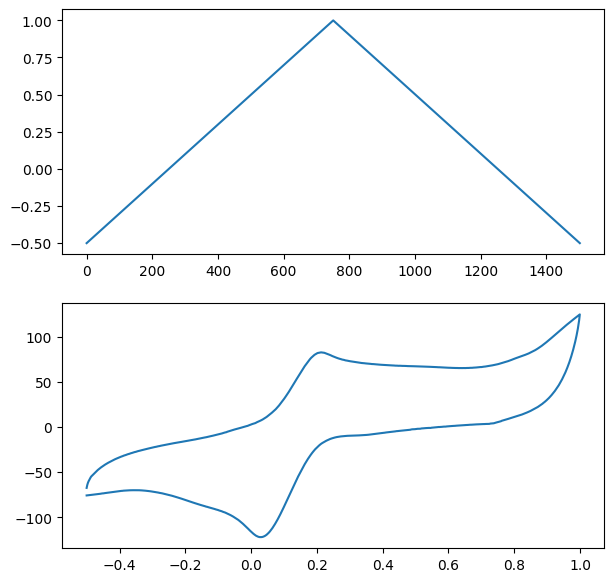

In [11]:
# Plotando a rampa de potencial
fig, (ax1, ax2) = plt.subplots(figsize=(7,7), ncols=1, nrows=2)
ax1.plot(potencial)
ax2.plot(potencial, dataset_t.iloc[:,2])
plt.show()


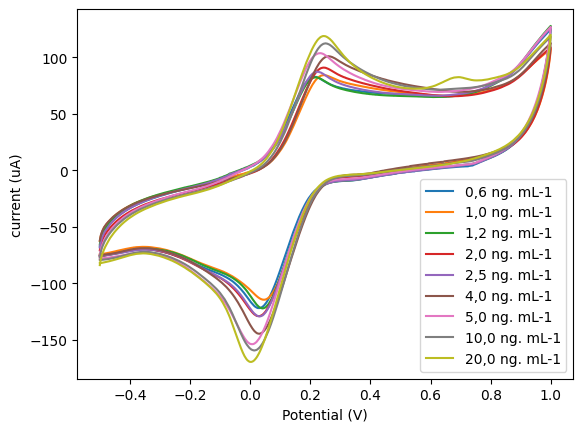

In [12]:
currents = dataset_t.iloc[:,2:]
titles = currents.columns

for i in range(currents.shape[1]):
    plt.plot(potencial, currents.iloc[:,i].values, label = titles[i])

plt.xlabel('Potential (V)')
plt.ylabel('current (uA)')
plt.legend()    
plt.show()

## Transformando as correntes para o domínio do tempo

In [13]:
from electrodes_manipulation import Electrode
scan_rate = 0.02 # 20mV/s
electrode = Electrode()
time = electrode.getTime(scan_rate, potencial) # Time in seconds
print(len(time))

1503


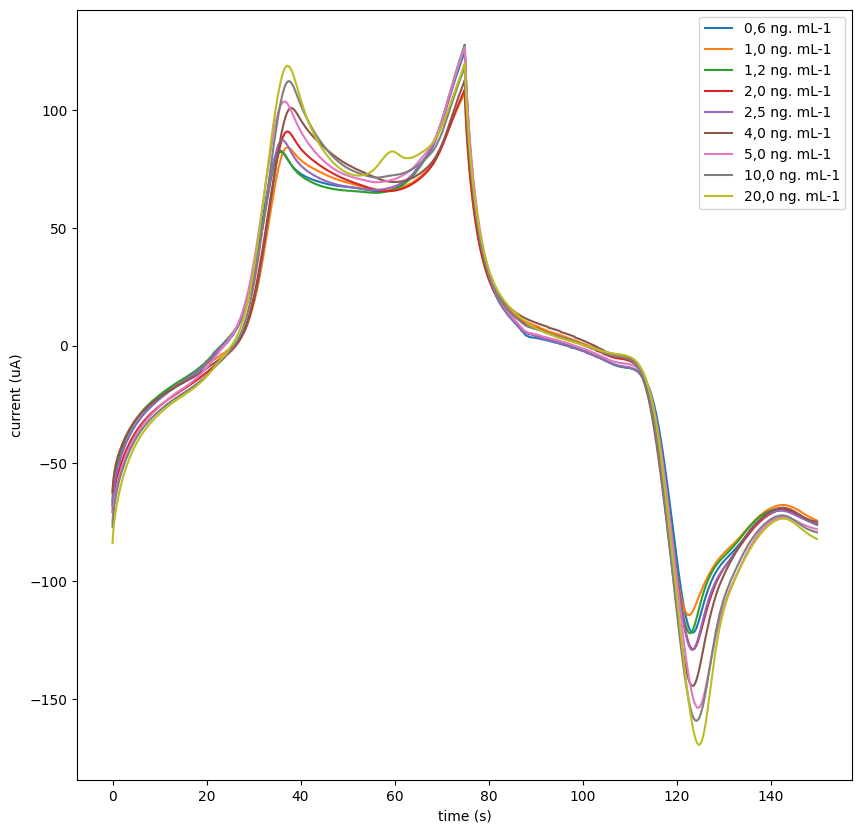

In [14]:
# Plotando as correntes em função do tempo
plt.figure(figsize=(10,10))
for i in range(currents.shape[1]):
    plt.plot(time, currents.iloc[:,i].values, label = titles[i])

plt.xlabel('time (s)')
plt.ylabel('current (uA)')
plt.legend()    
plt.show()

Critical frequency 0.0265956265247277
Critical frequency 0.0265956265247277
Critical frequency 0.0265956265247277
Critical frequency 0.0265956265247277
Critical frequency 0.0265956265247277
Critical frequency 0.0265956265247277
Critical frequency 0.0265956265247277
Critical frequency 0.0265956265247277
Critical frequency 0.0265956265247277


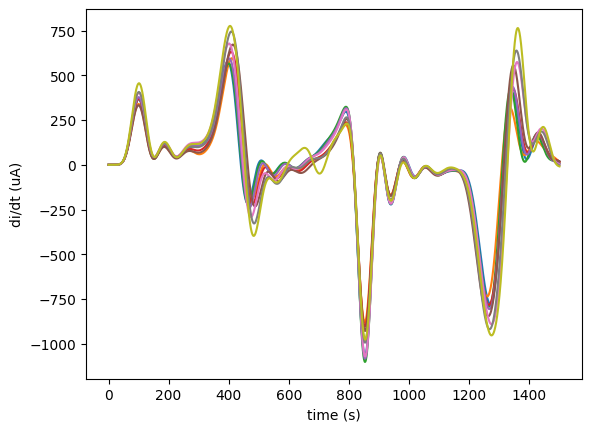

In [15]:
# Plotando a derivada em função do Tempo
for i in range(currents.shape[1]):
    _,derivate = electrode.derivate(potencial, currents.iloc[:,i].values)
    plt.plot(derivate)

plt.xlabel('time (s)')
plt.ylabel('di/dt (uA)')
plt.show()

In [17]:
# Pega os argomentos das correntes anódicas e catódicas, retorna -1 se não achar o pico
def getAnodicAndCathodicArguments(current, fp, ox_inf = 500, ox_sup = 630, red_inf = 200, red_sup = 300):
    result_an_arg = 0
    result_cat_arg = 0
    # Encontrando os picos das duas funções
    results = fp.fit(current)
    #fp.plot(figsize=(12,7))
    results_df = results['df']
    # Separando os picos relacionados à oxidação
    results_oxidation = results_df.iloc[ox_inf:ox_sup,:]
    results_reduction = results_df.iloc[red_inf:red_sup, :]
    arg_anodic = results_oxidation[results_oxidation['peak'] == True]['x'].values
    arg_cathodic = results_reduction[results_reduction['valley'] == True]['x'].values
    
    if (len(arg_anodic) == 0):
        print("Erro na corrente anódica")
        result_an_arg = -1
    else:
        result_an_arg = arg_anodic[0]
        
    if (len(arg_cathodic) == 0):
        print("Erro na corrente catódica")
        result_cat_arg = -1
    else:
        result_cat_arg = arg_cathodic[0]
        
    return (result_an_arg, result_cat_arg)

# Calcula a carga total
def getTotalCharge(current, time):
    charge = np.trapz(current, time, axis=0)
    return charge

## Montagem do dataset

Critical frequency 0.0265956265247277
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
Critical frequency 0.0265956265247277
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
Critical frequency 0.0265956265247277
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
Critical frequency 0.0265956265247277
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
Critical frequency 0.0265956265247277
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
Critical frequency 0.0265956265247277
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
Critical frequency 0.0265956265247277
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
Critical frequency 0.0265956265247277
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
Critical frequency 0.0265956265247277
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..


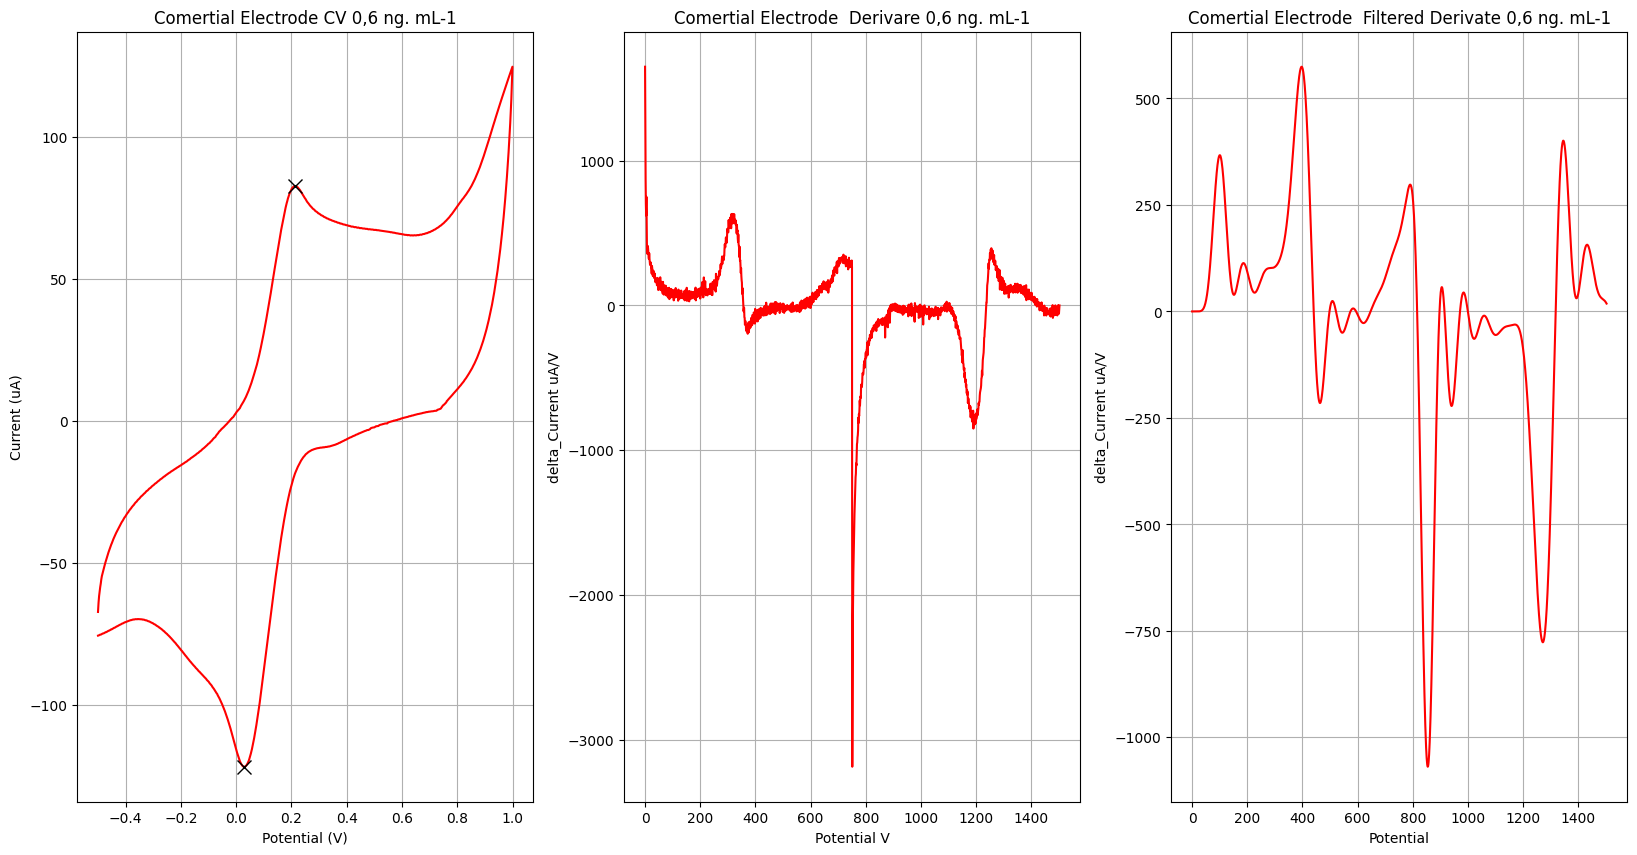

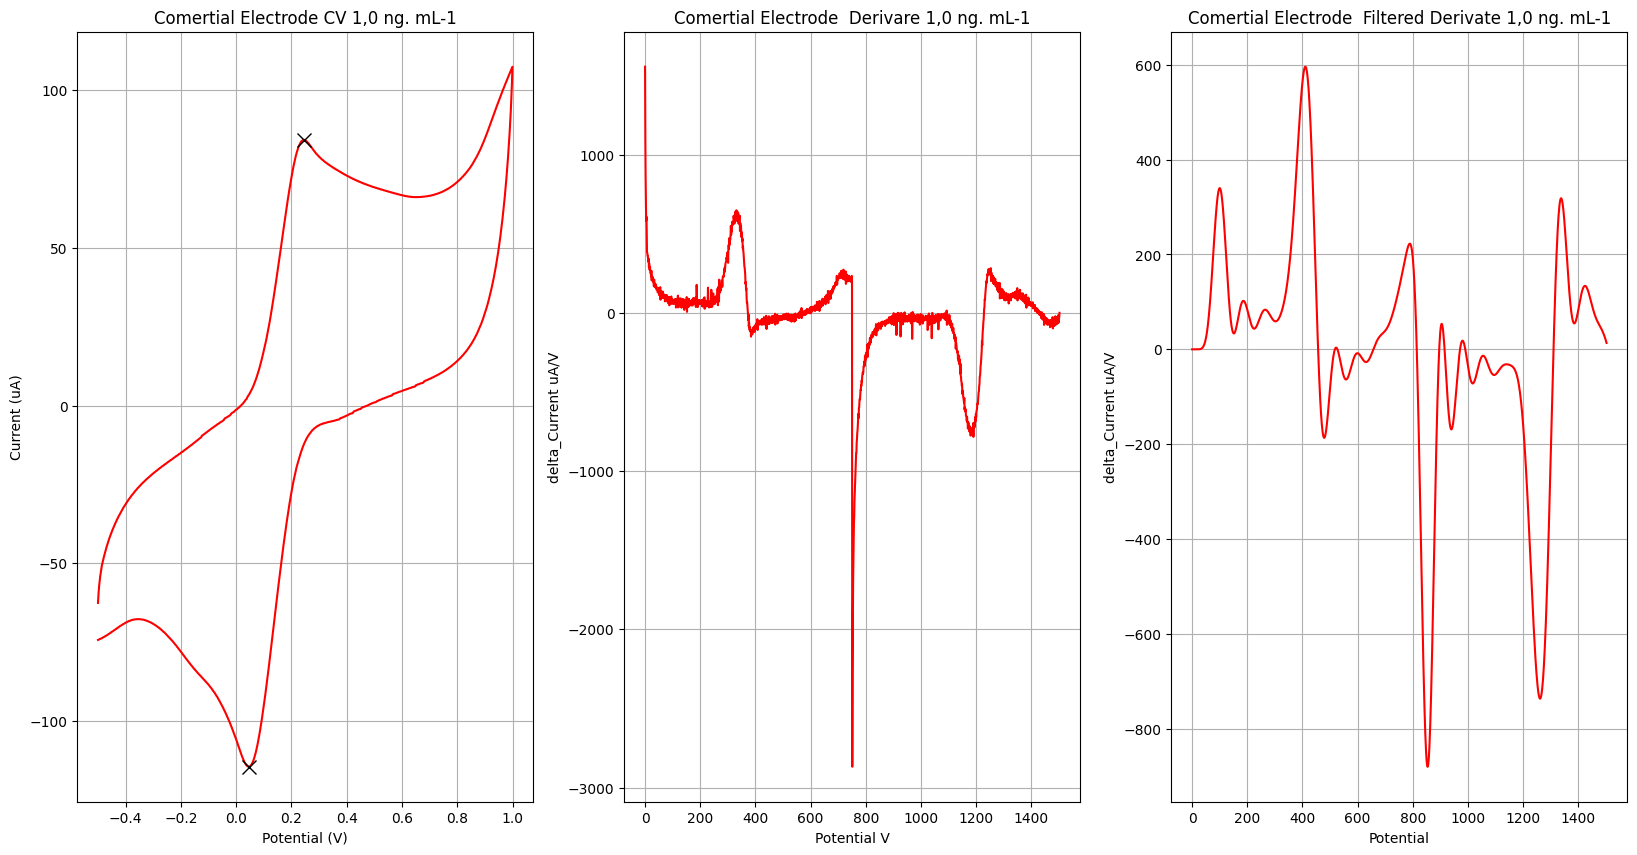

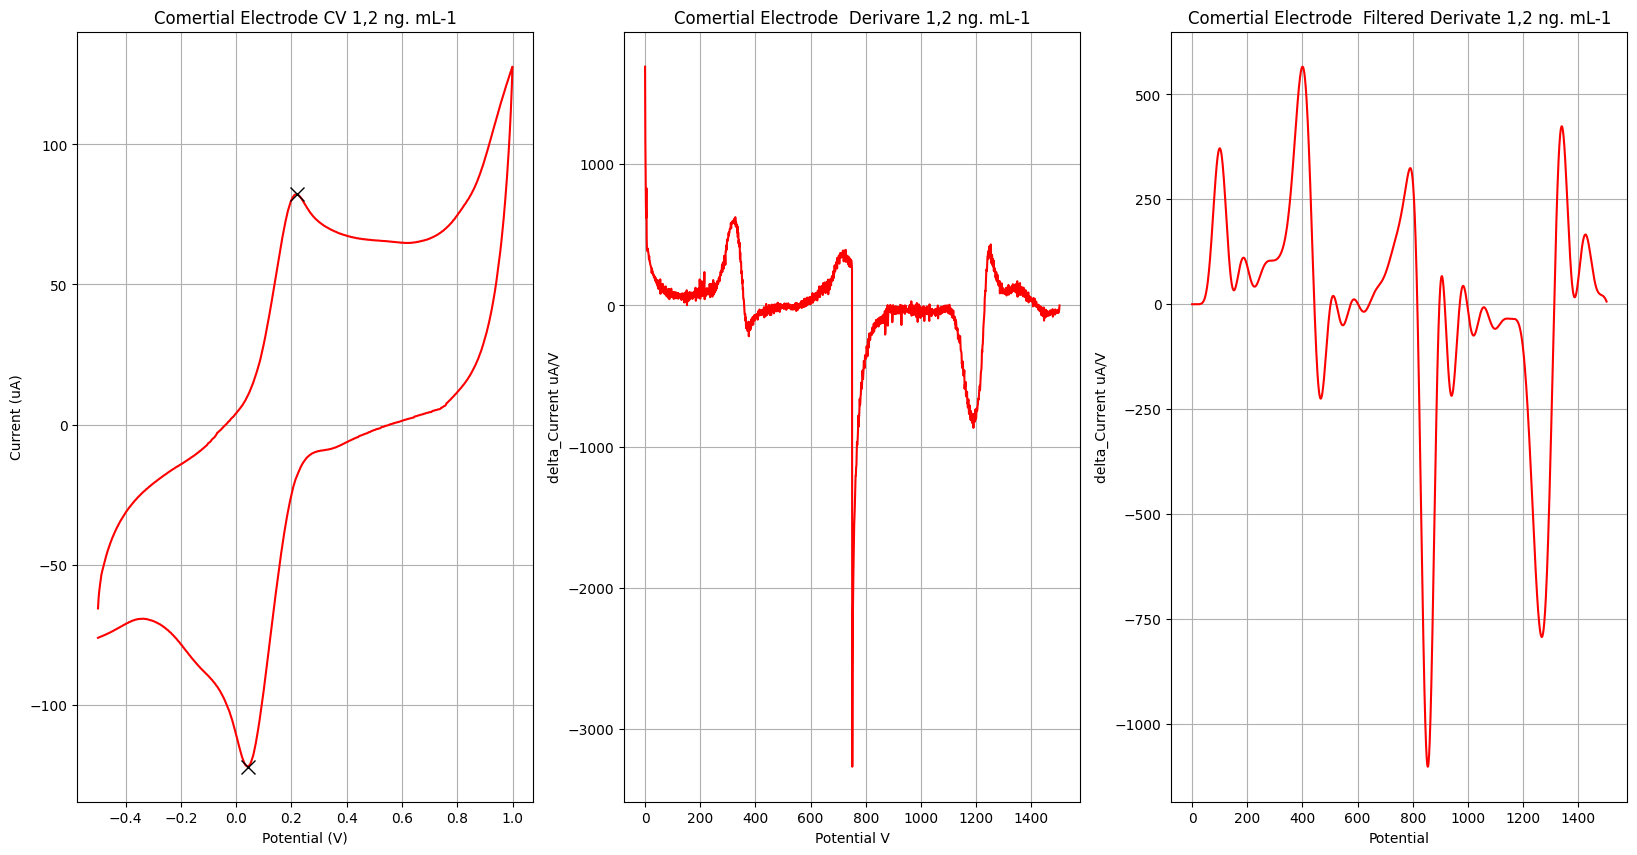

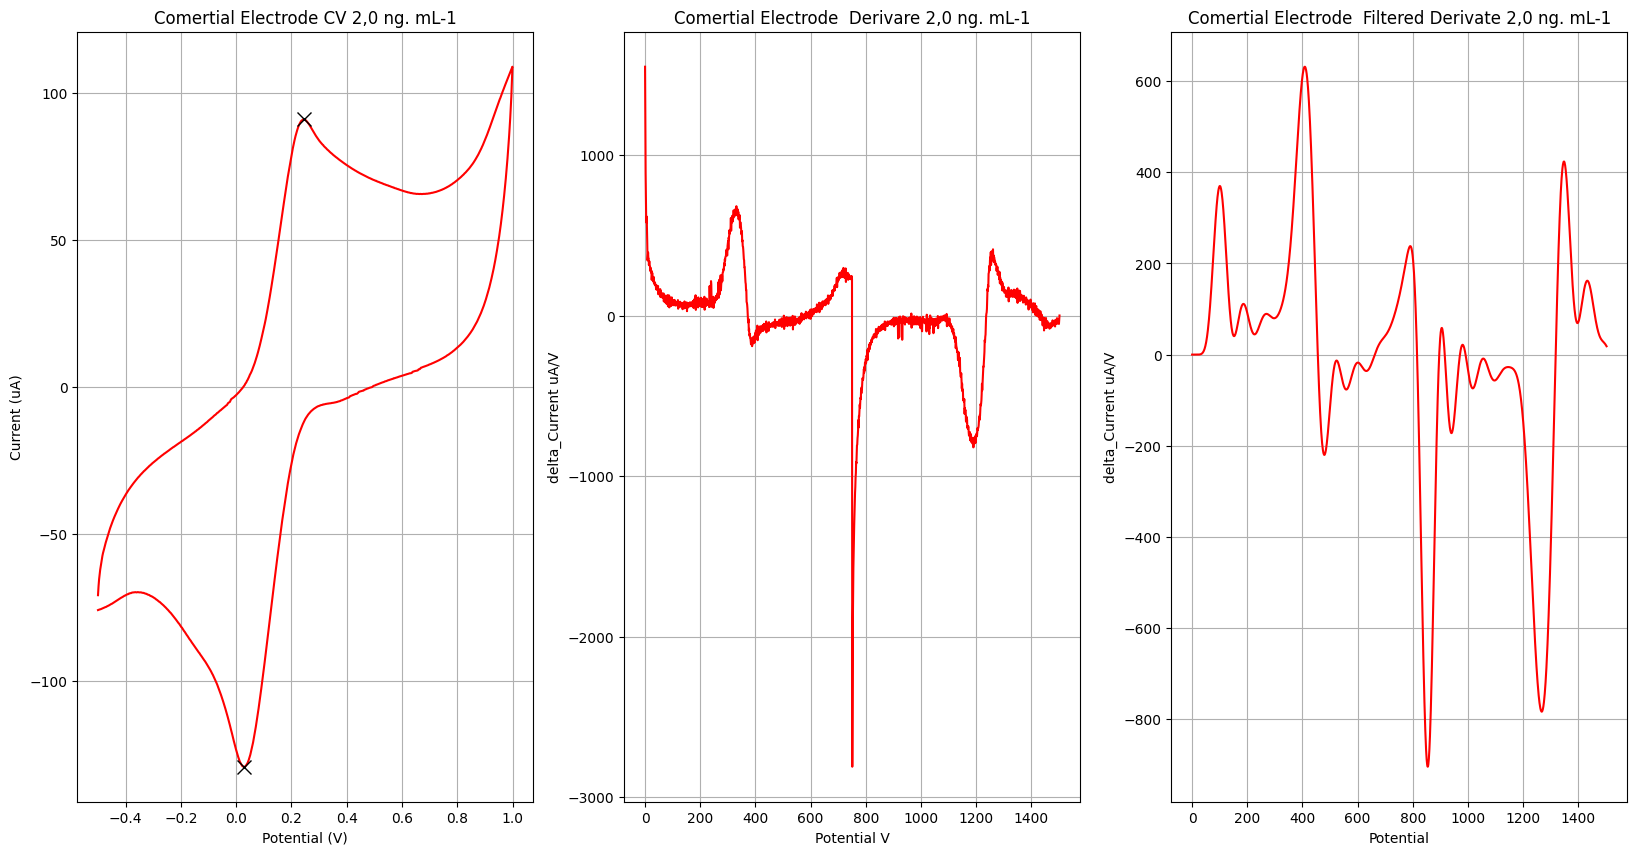

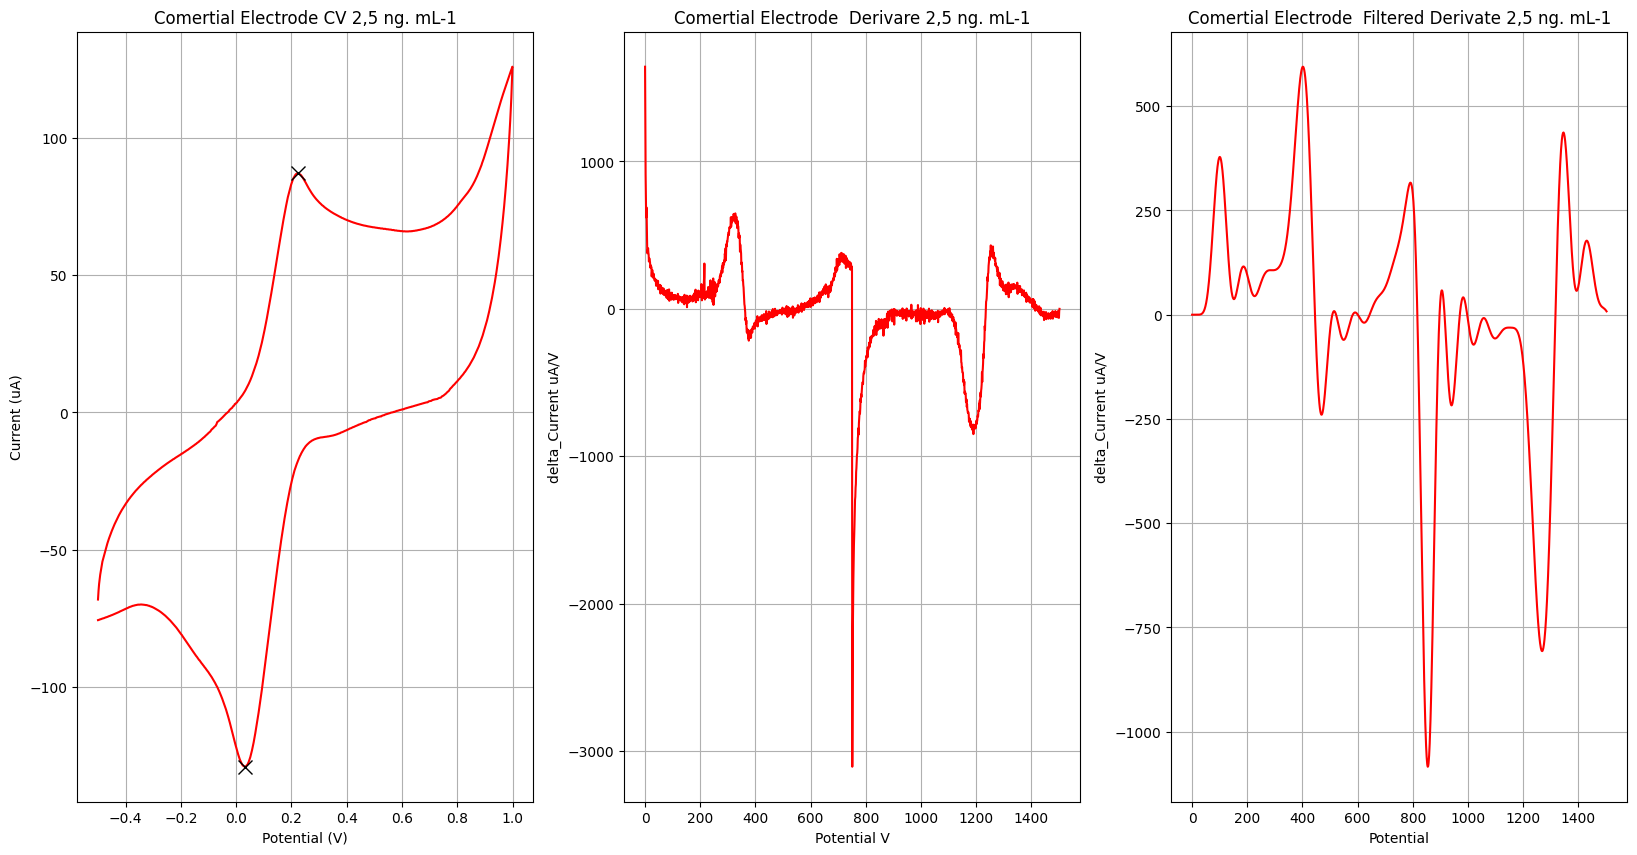

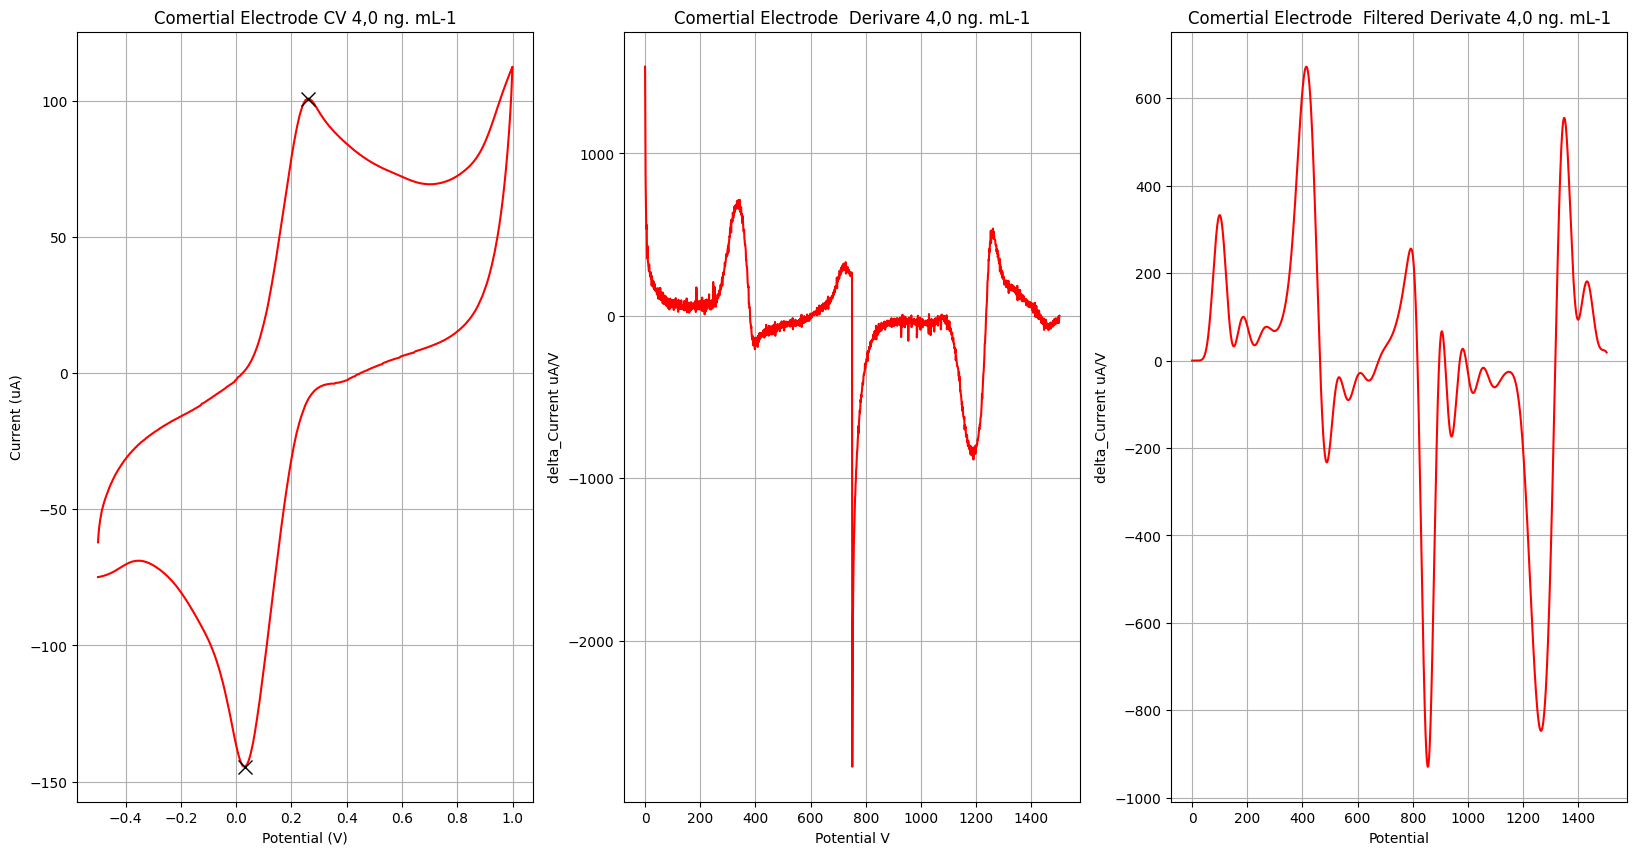

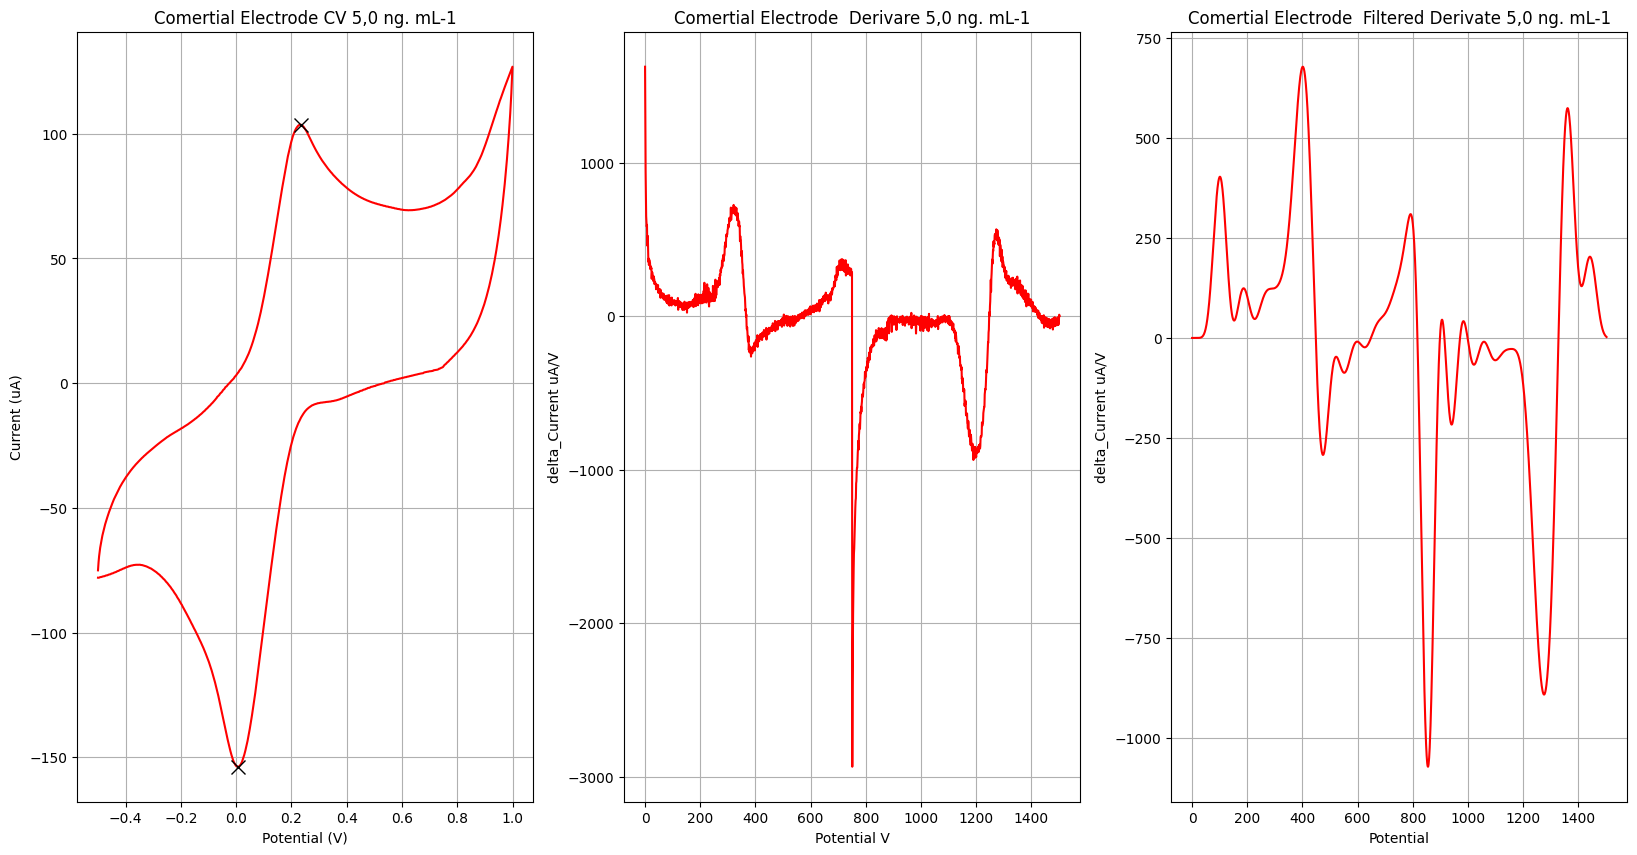

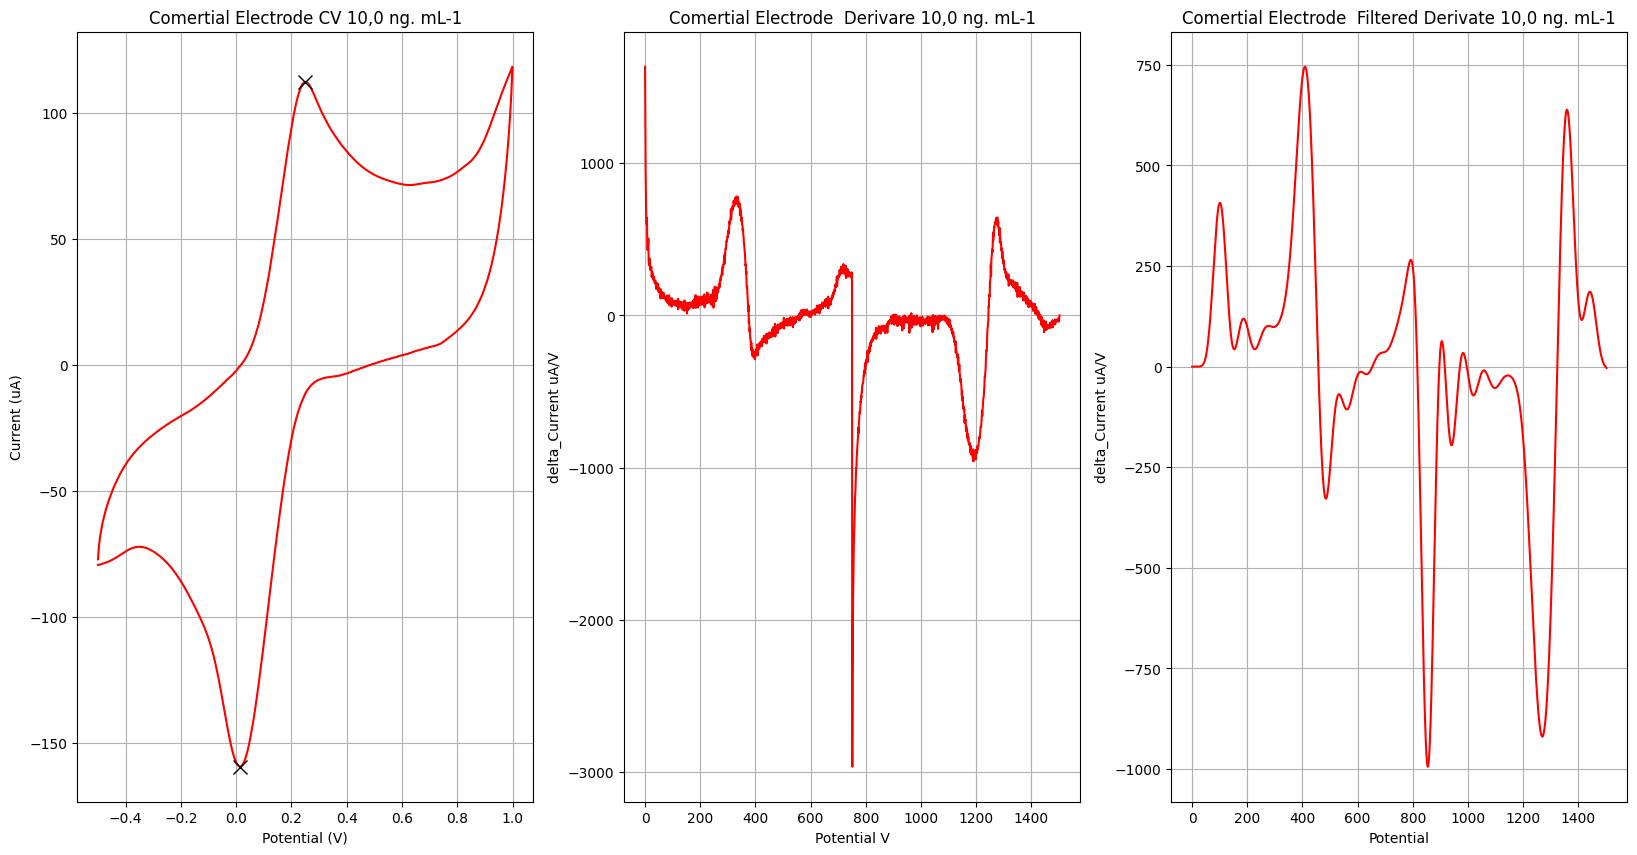

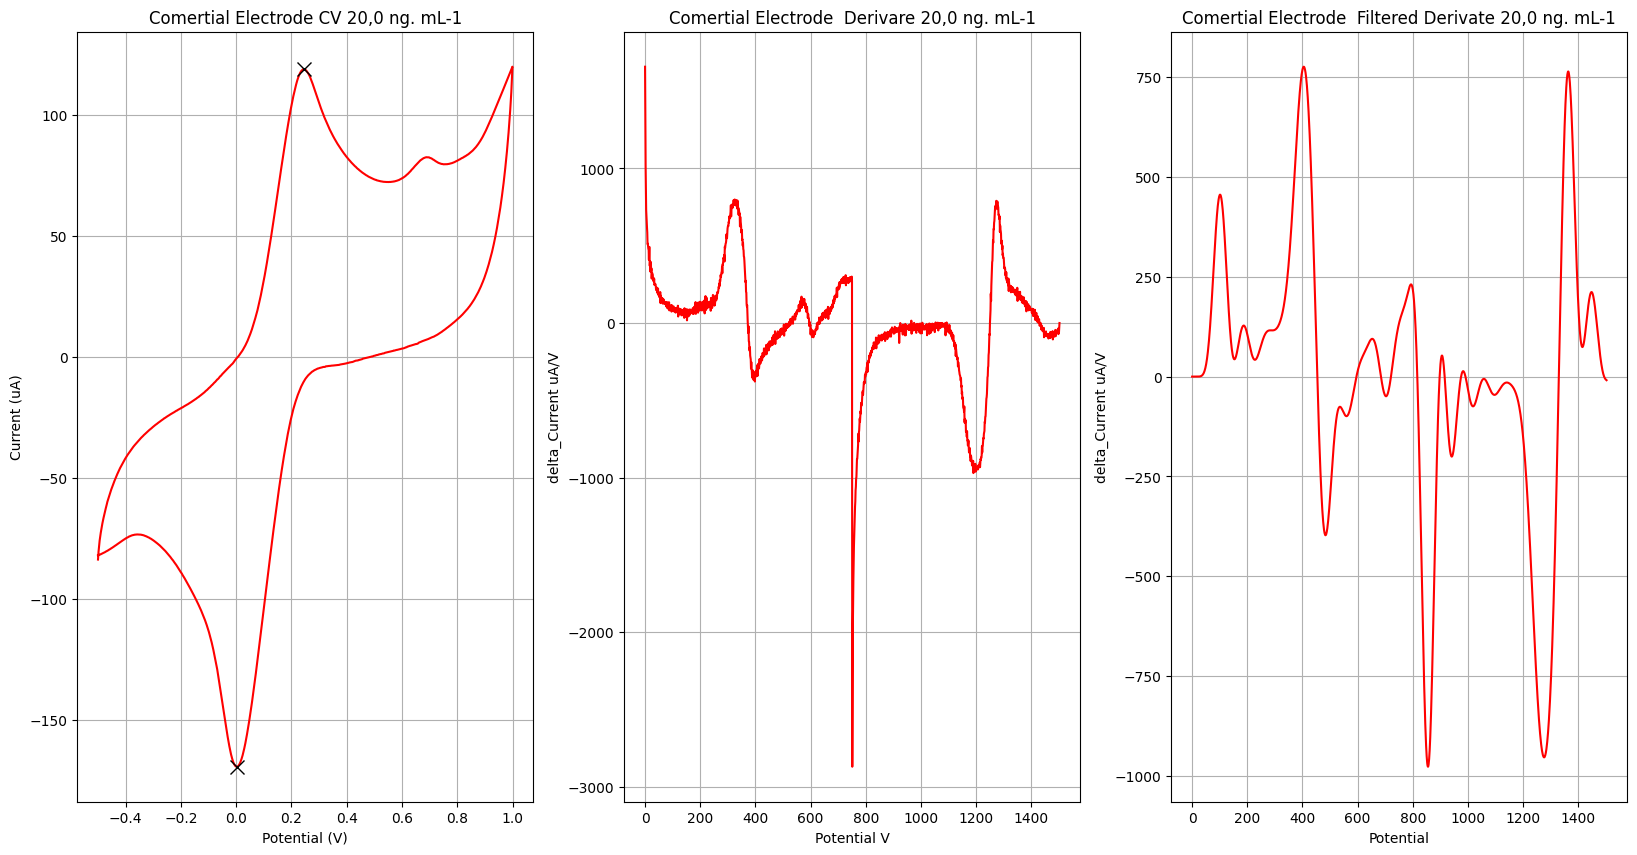

In [48]:
# Dados de eletrodos comerciais sem rodamina
comertial_elec_derivate = pd.DataFrame(columns=currents.columns)
comertial_elec_anodic_current = []
comertial_elec_cathodic_current = []
comertial_elec_diff_ano_cat_potential = []
comertial_elec_diff_ano_cat_current = []
potential_comertial_elec = potencial


fp = findpeaks(method='peakdetect', lookahead=10)

for i in range (currents.shape[1]):
    plot_peak = False
    current = currents.iloc[:, i].values
    current_rod = currents.iloc[:, i].values

    current_derivate, derived_current_filtered = electrode.derivate(potential_comertial_elec, current)

    comertial_elec_derivate[currents.columns[i]] = derived_current_filtered

    #(anodic, cathodic) = getAnodicAndCathodicArguments(current, fp, ox_inf = 1200, ox_sup = 1300, red_inf = 260, red_sup = 400)
    (anodic, cathodic) = getAnodicAndCathodicArguments(current, fp, ox_inf = 280, ox_sup = 420, red_inf = 1200, red_sup = 1300)
    
    if (anodic != -1 and cathodic != -1):
        comertial_elec_anodic_current.append(current[anodic])
        comertial_elec_cathodic_current.append(current[cathodic])
        comertial_elec_diff_ano_cat_current.append(abs(current[anodic] - current[cathodic]))
        comertial_elec_diff_ano_cat_potential.append(abs(potential_comertial_elec[anodic] - potential_comertial_elec[cathodic]))
        plot_peak = True
        
    elif (anodic == -1):
         comertial_elec_anodic_current.append(np.nan)
         comertial_elec_cathodic_current.append(current[cathodic])
         comertial_elec_diff_ano_cat_current.append(np.nan)
         comertial_elec_diff_ano_cat_potential.append(np.nan)
         
    elif (cathodic == -1):
        comertial_elec_anodic_current.append(current[anodic])
        comertial_elec_cathodic_current.append(np.nan)
        comertial_elec_diff_ano_cat_current.append(np.nan)
        comertial_elec_diff_ano_cat_potential.append(np.nan)

 
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(20,10))
    ax1.set_title("Comertial Electrode CV " + currents.columns[i])
    ax1.set_ylabel("Current (uA)")
    ax1.set_xlabel("Potential (V)")
    ax1.grid(True)
        
    ax2.set_title("Comertial Electrode  Derivare " + currents.columns[i])
    ax2.set_ylabel("delta_Current uA/V")
    ax2.set_xlabel("Potential V")
        
    ax2.grid(True)
        
    ax3.set_title("Comertial Electrode  Filtered Derivate " + currents.columns[i])
    ax3.set_ylabel("delta_Current uA/V")
    ax3.set_xlabel("Potential")
        
    ax3.grid(True)
        
          
    ax1.plot(potential_comertial_elec, current, color='r', label="Virgin " + str(i))
    #ax1.plot(potential_comertial_elec, current_rod, color='b', label="Modified" + str(i))

    if (plot_peak):
        ax1.plot(potential_comertial_elec[anodic], current[anodic], marker="x", markersize=10, markeredgecolor="black")
        ax1.plot(potential_comertial_elec[cathodic], current[cathodic], marker="x", markersize=10, markeredgecolor="black")
        
    #ax1.legend() 
    ax2.plot(current_derivate, color='r', label="virgin: " + str(i))
    #ax2.plot(current_derivate_rod, color='b', label="modified " + str(i))
    #ax2.legend()
    #ax3.plot(potential_neg, derived_current_filtered, color=colors[plots], label="case: " + str(plots + 1))
    ax3.plot(derived_current_filtered, color='r', label="virgin: " + str(i))
    #ax3.plot(potential_comertial_elec, derived_current_filtered_rod, color='b', label="modified: " + str(i))
    #ax3.legend() 
    plot_peak_rod = False
    plot_peak = False
    
plt.show()

## Analisando com base no tempo

Critical frequency 0.0265956265247277
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
Critical frequency 0.0265956265247277
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
Critical frequency 0.0265956265247277
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
Critical frequency 0.0265956265247277
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
Critical frequency 0.0265956265247277
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
Critical frequency 0.0265956265247277
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
Critical frequency 0.0265956265247277
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
Critical frequency 0.0265956265247277
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
Critical frequency 0.0265956265247277
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..


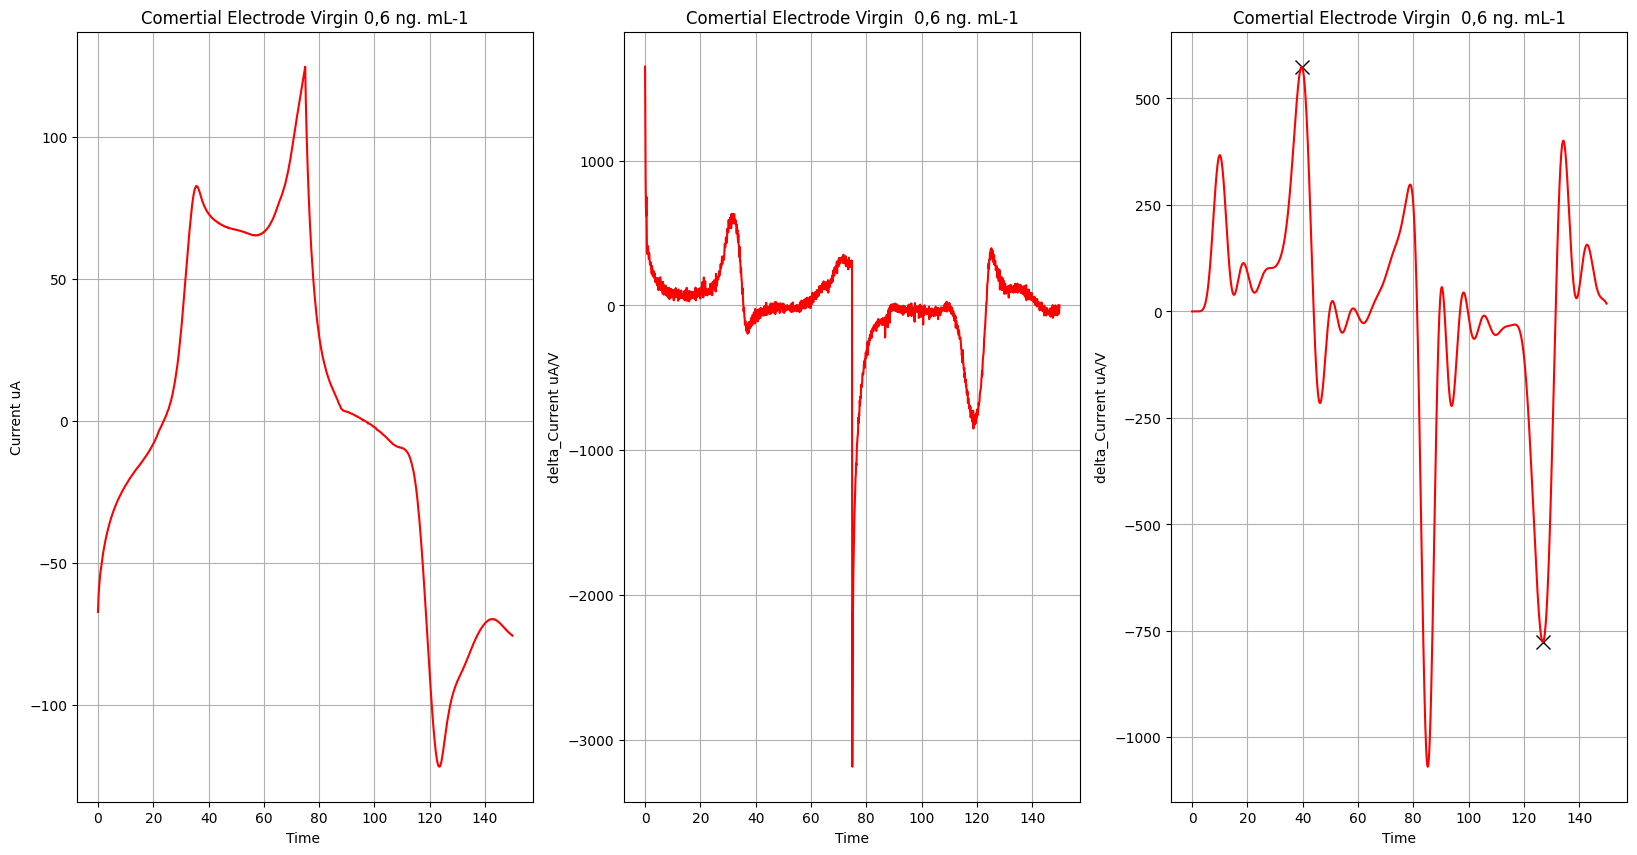

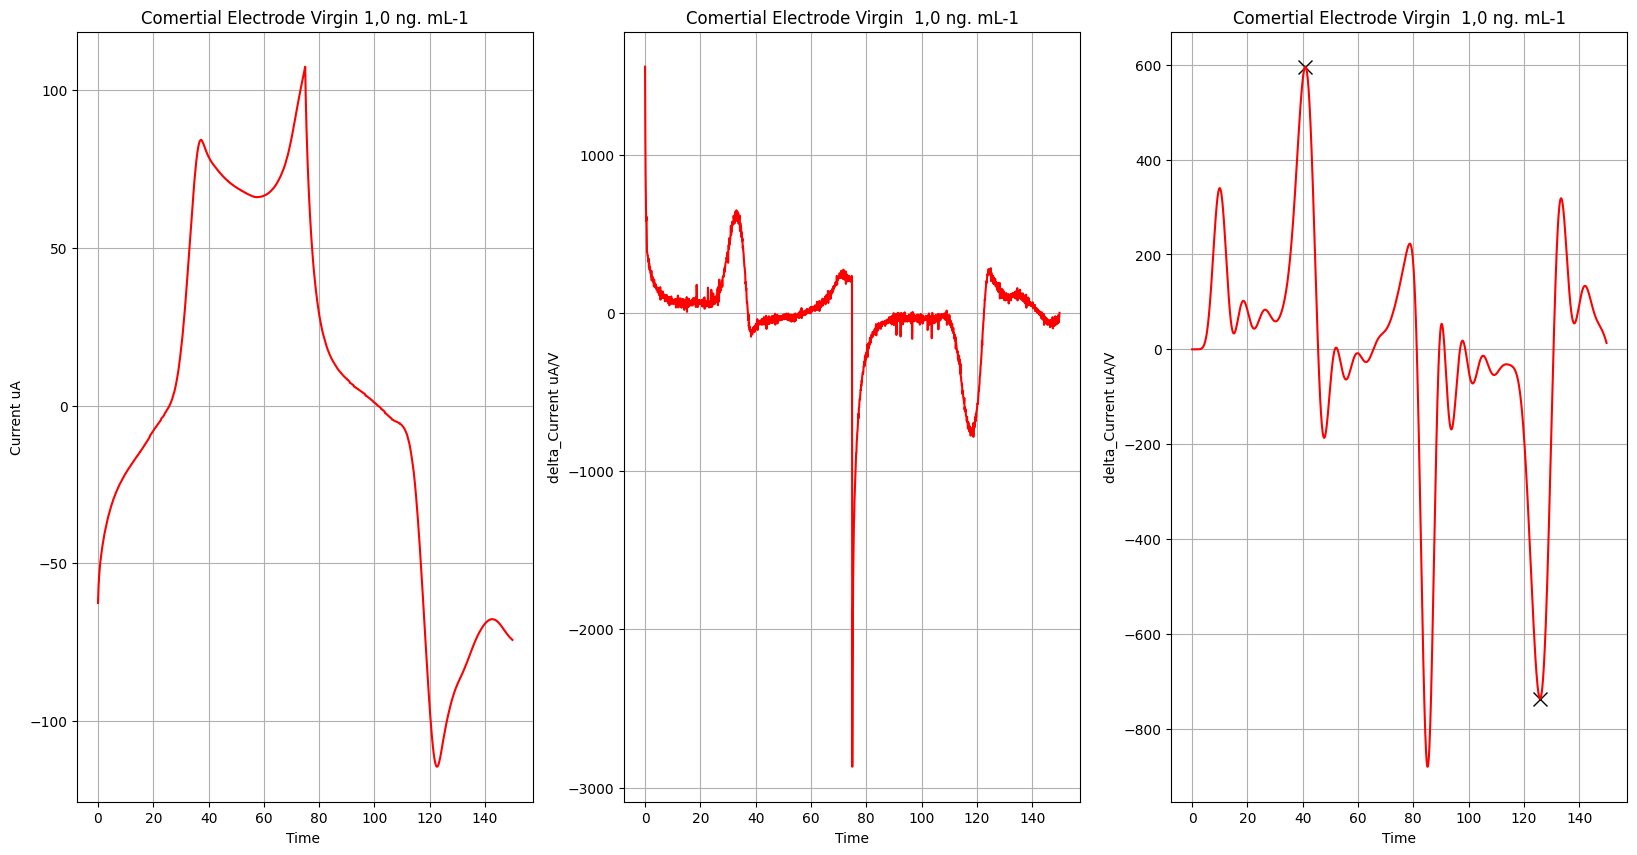

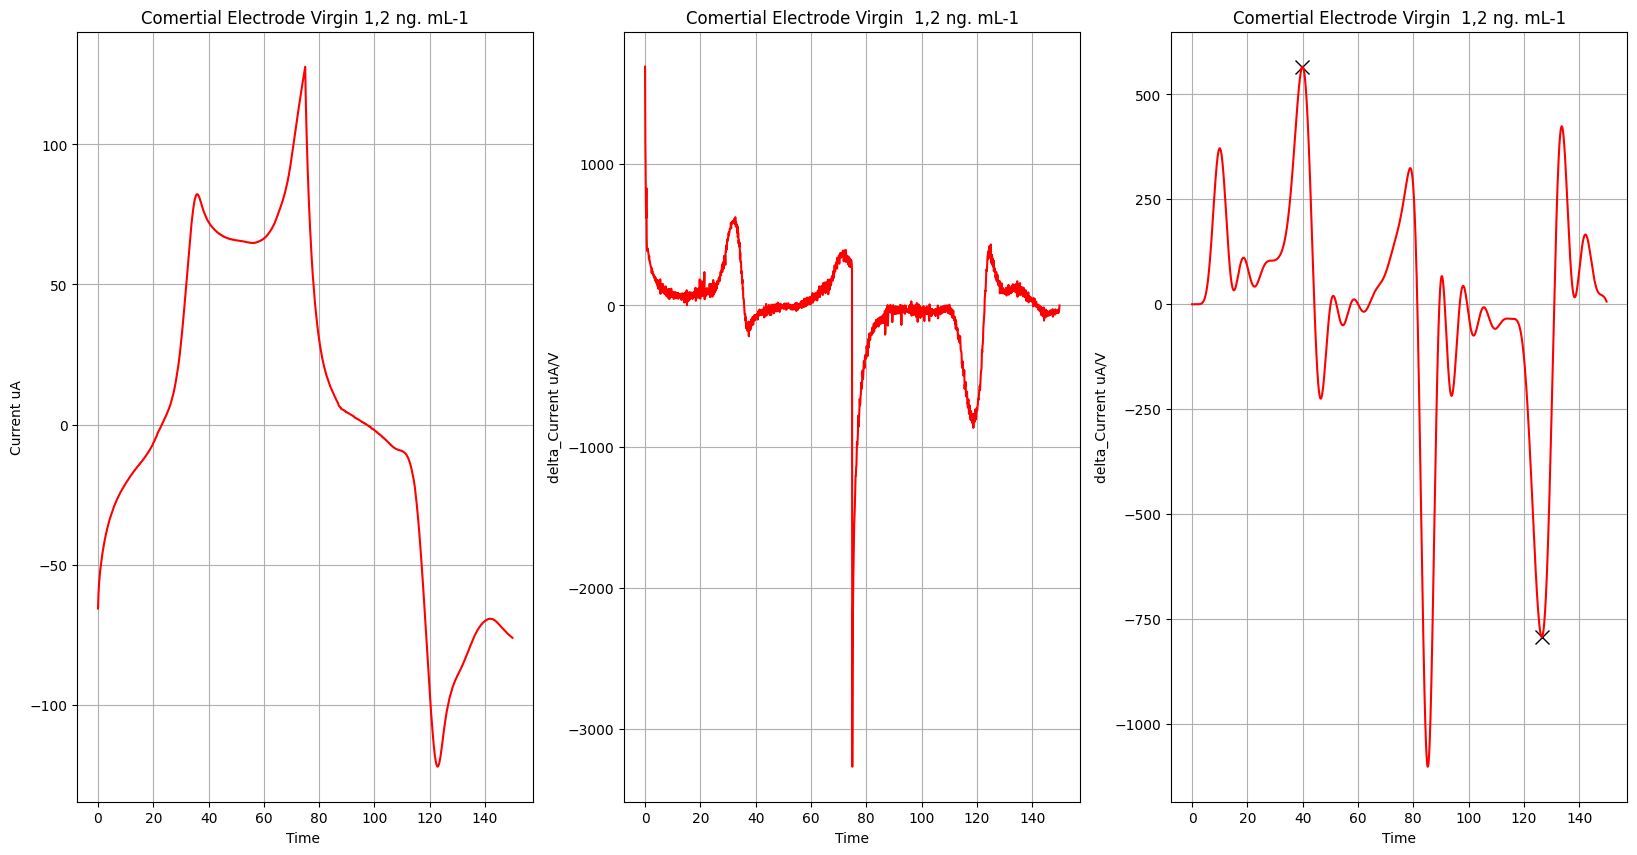

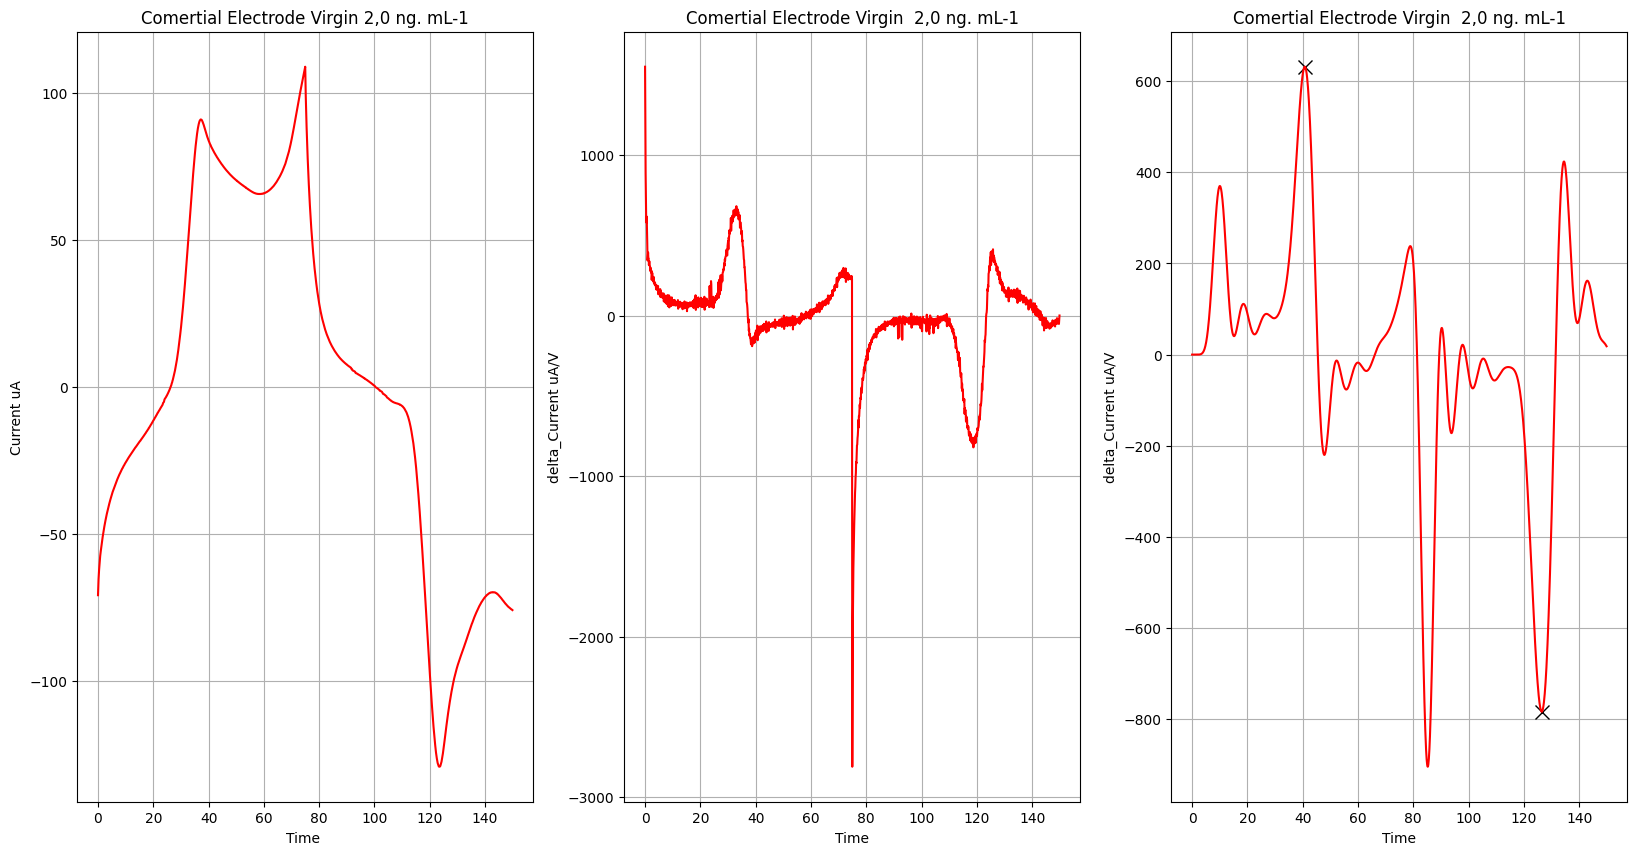

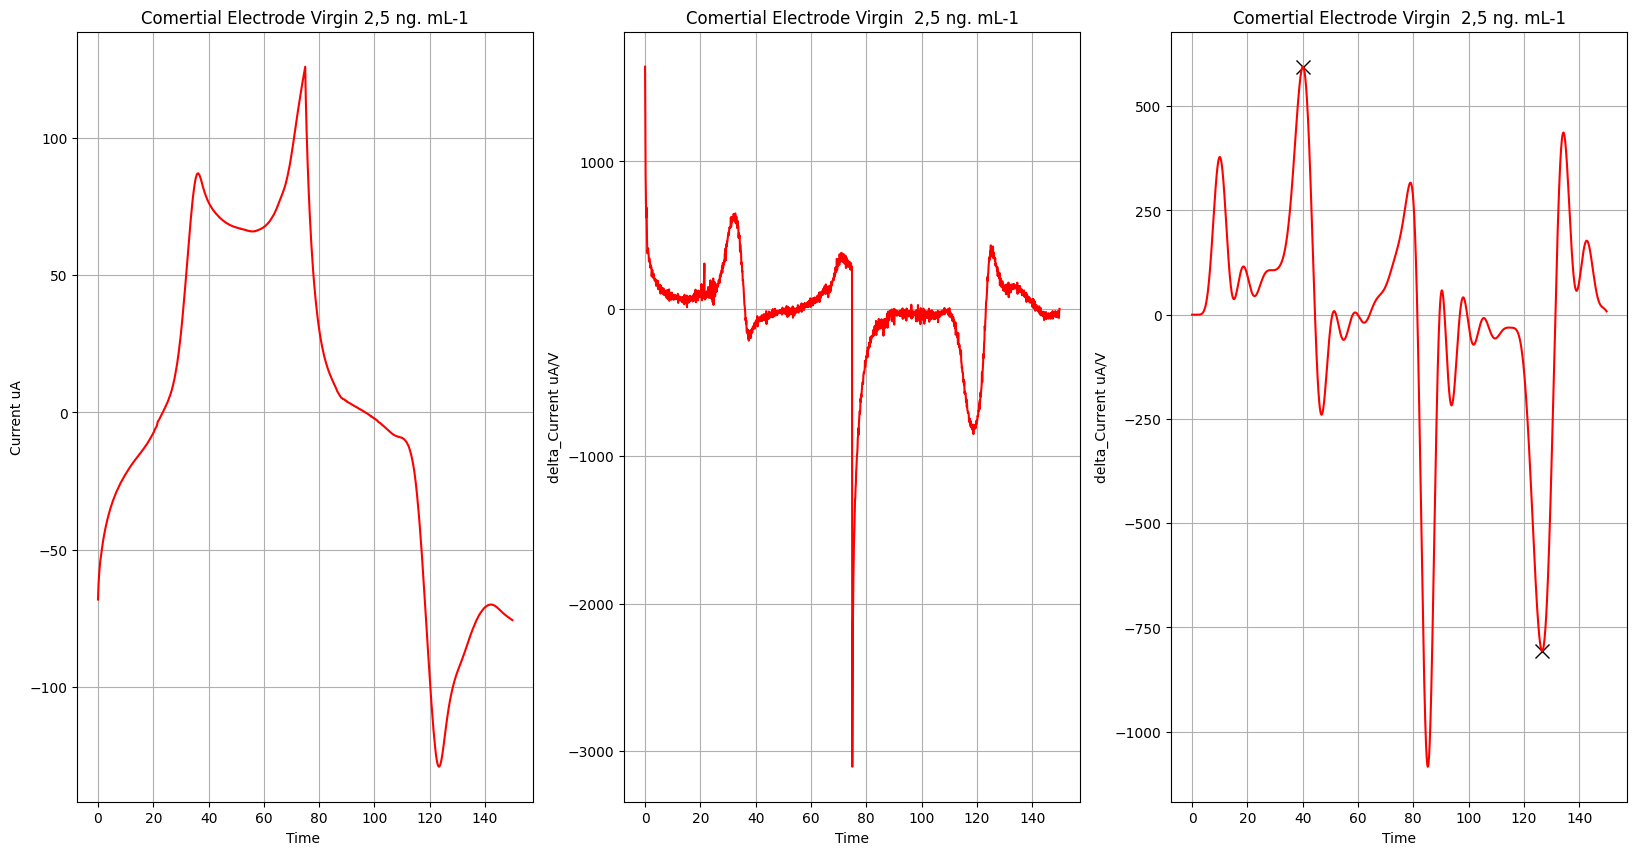

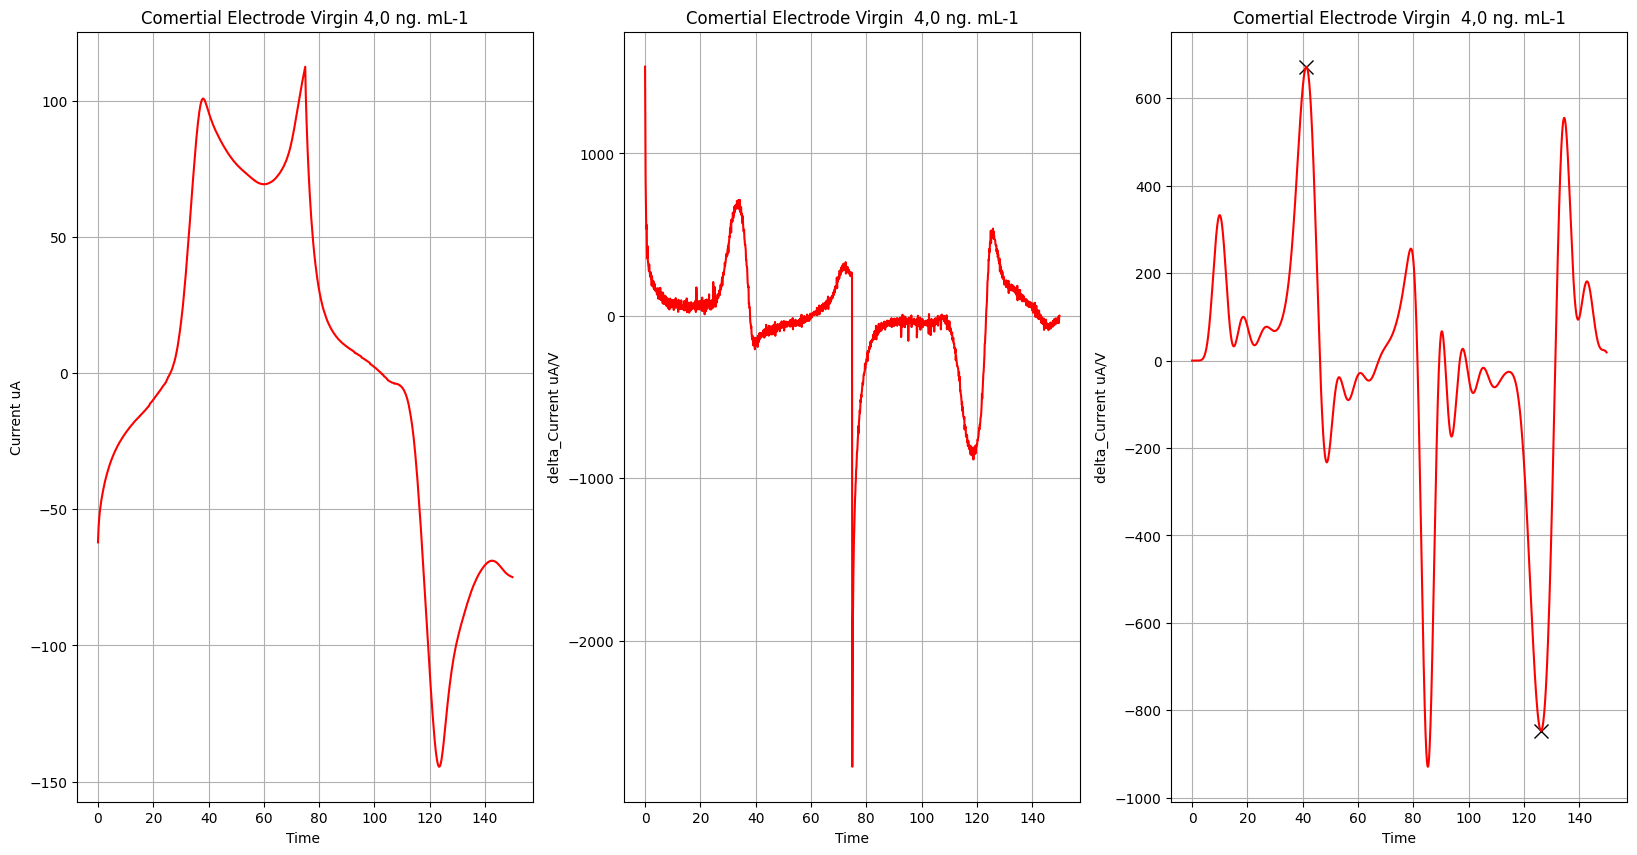

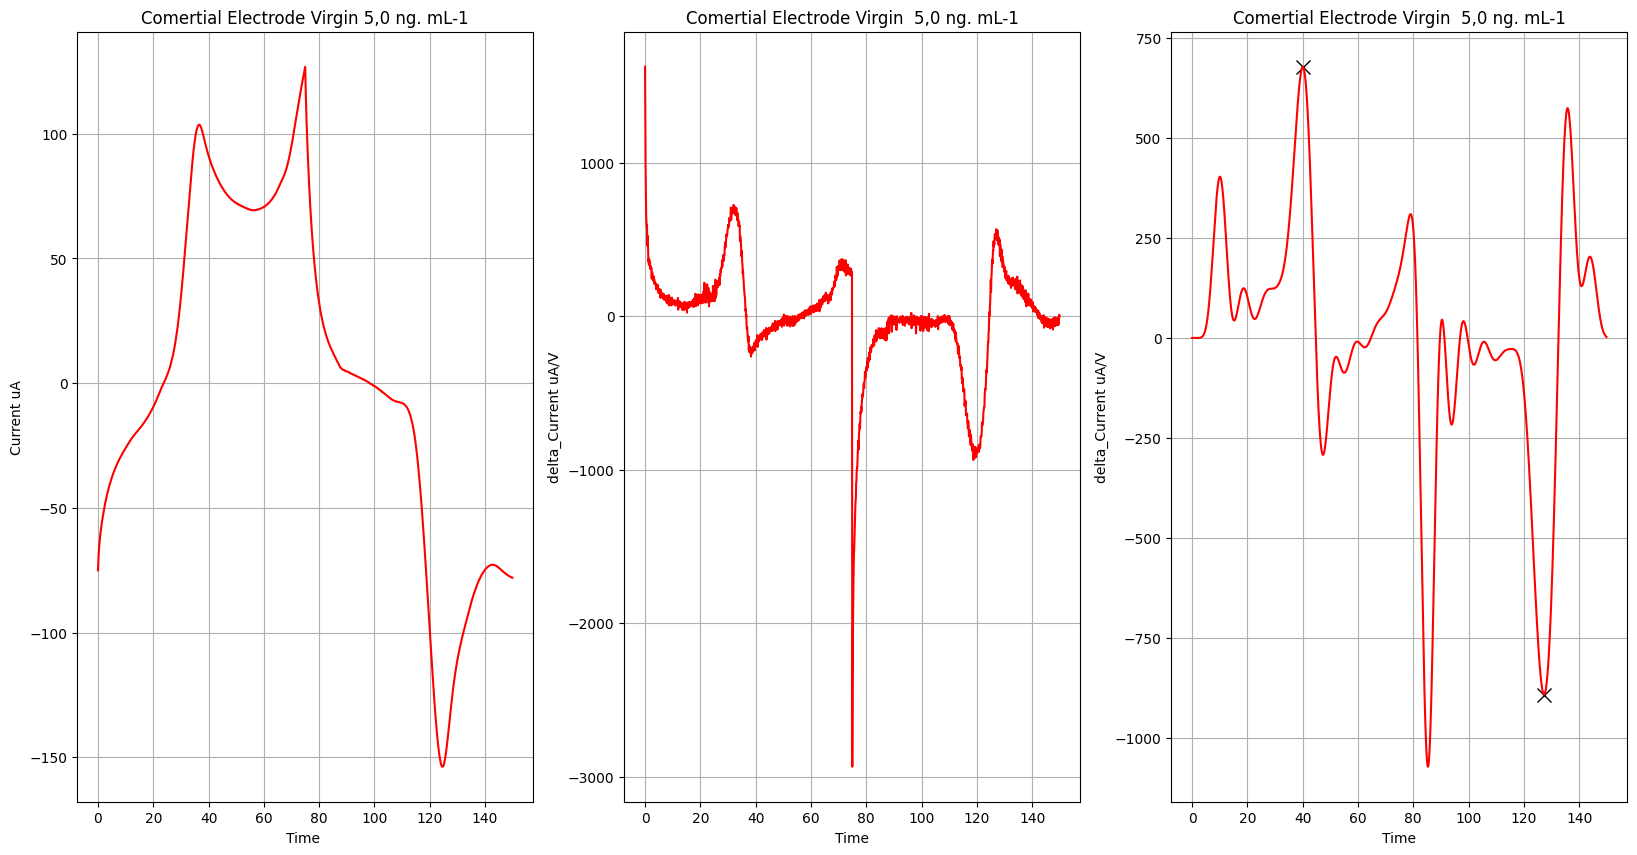

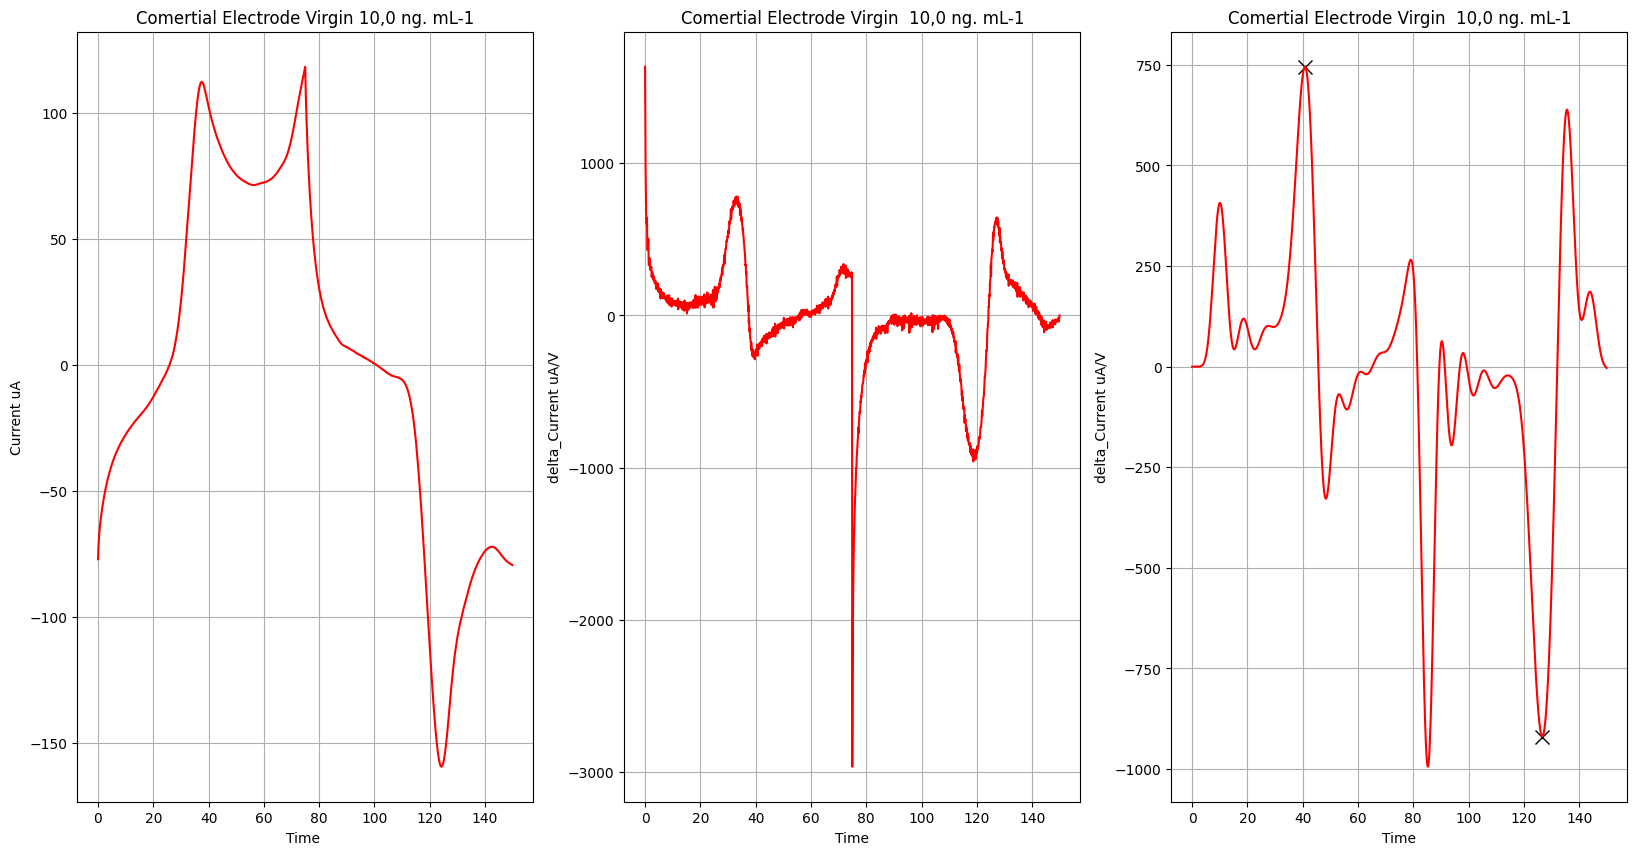

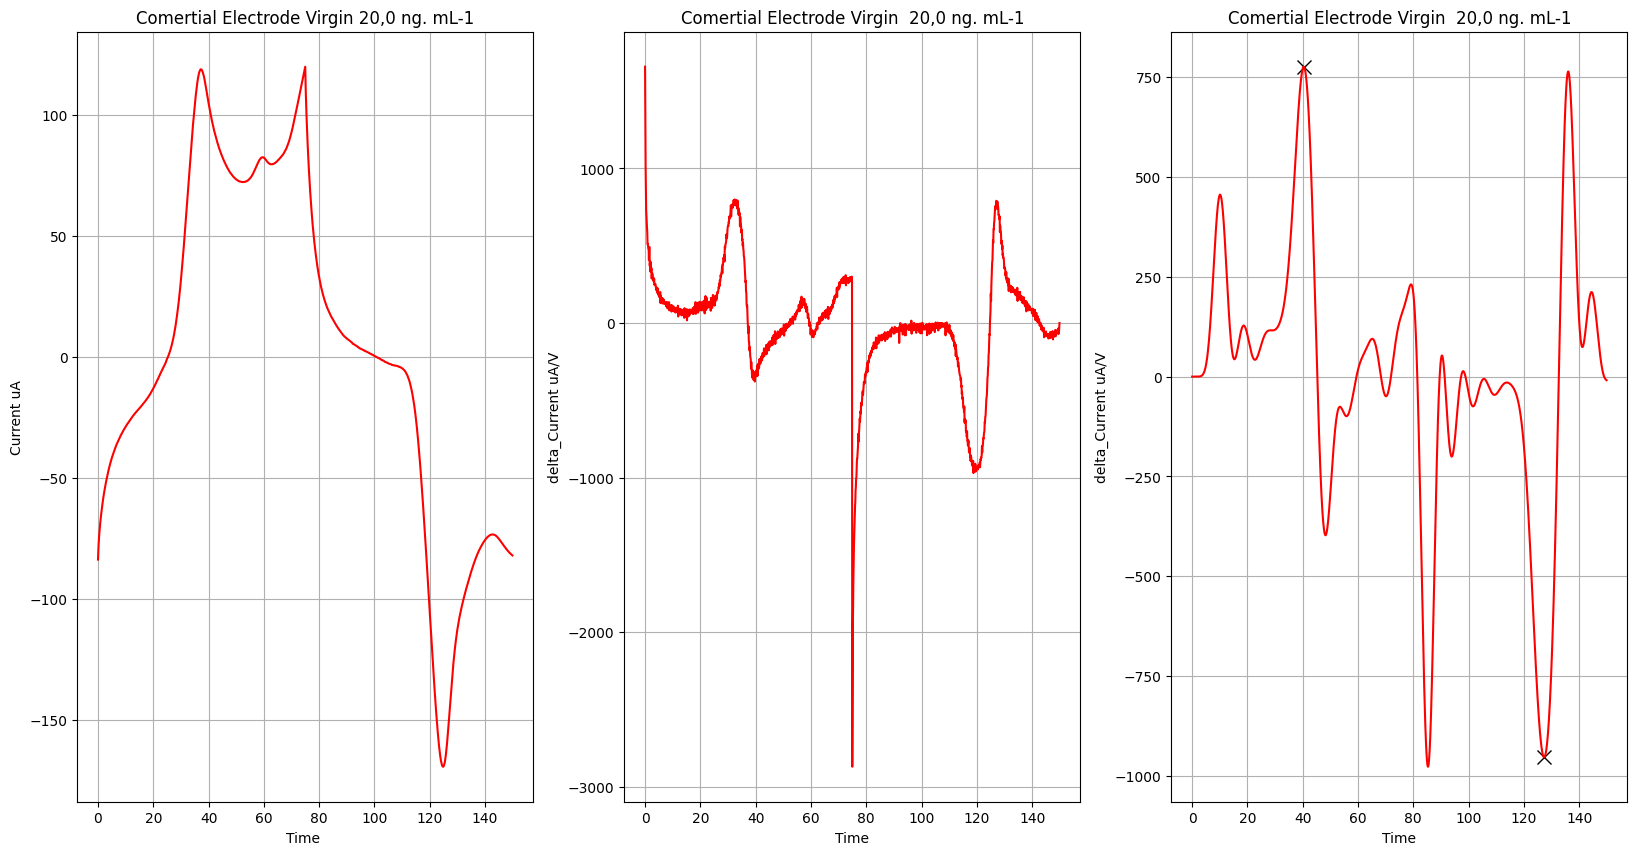

In [49]:
charge_commertial = []
derivate_comertial_anodic_peak = []
derivate_comertial_cat_peak = []
plot_peak = False

for i in range (currents.shape[1]):
    plot_peak = False
    current = currents.iloc[:, i].values
    current_derivate, derived_current_filtered = electrode.derivate(potential_comertial_elec, current)

    charge_commertial.append(getTotalCharge(current, time))

    (anodic, cathodic) = getAnodicAndCathodicArguments(derived_current_filtered, fp, ox_inf = 300, ox_sup = 420, red_inf = 1200, red_sup = 1300)  
    
    if (anodic != -1 and cathodic != -1):
        derivate_comertial_anodic_peak.append(derived_current_filtered[anodic])
        derivate_comertial_cat_peak.append(derived_current_filtered[cathodic])
        plot_peak = True
        
    elif (anodic == -1):
         derivate_comertial_anodic_peak.append(np.nan)
         derivate_comertial_cat_peak.append(derived_current_filtered[cathodic])
         
    elif (cathodic == -1):
        derivate_comertial_anodic_peak.append(derived_current_filtered[anodic])
        derivate_comertial_cat_peak.append(np.nan)

    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(20,10))
    ax1.set_title("Comertial Electrode Virgin " + currents.columns[i])
    ax1.set_ylabel("Current uA")
    ax1.set_xlabel("Time ")
    ax1.grid(True)
        
    ax2.set_title("Comertial Electrode Virgin  " + currents.columns[i])
    ax2.set_ylabel("delta_Current uA/V")
    ax2.set_xlabel("Time")
        
    ax2.grid(True)
    
    ax3.set_title("Comertial Electrode Virgin  " + currents.columns[i])
    ax3.set_ylabel("delta_Current uA/V")
    ax3.set_xlabel("Time")
        
    ax3.grid(True)
        
          
    ax1.plot(time, current, color='r', label="virgin " + str(i))
        
    ax2.plot(time, current_derivate, color='r', label="virgin: " + str(i))
    
    if (plot_peak):
        ax3.plot(time[anodic], derived_current_filtered[anodic], marker="x", markersize=10, markeredgecolor="black")
        ax3.plot(time[cathodic], derived_current_filtered[cathodic], marker="x", markersize=10, markeredgecolor="black")
    
    ax3.plot(time, derived_current_filtered, color='r', label="virgin: " + str(i))
    
plt.show()

## Avaliação Estatística das Características Extraídas


In [37]:
# Mostra estatísticas de um vetor de medidas
def showStatistics(array):
    print(f"Mean: {np.mean(array)}")
    print(f"Median: {np.median(array)}")
    print(f"Std: {np.std(array)}")
    print(f"Maximum: {np.max(array)}")
    print(f"Minumum: {np.min(array)}")
    print(f"Resultado Normalidade Shapiro-Wilk {stats.shapiro(array)}")
    print("\n\n")
    #sm.qqplot(np.array(array))

# Plota as classes de features em azul = positivo e vermelho = negativo
def plot_classes(positive, negative):
    fig, ax = plt.subplots(figsize=(7,5))
    ax.scatter(np.ones(shape=(len(positive))), positive, color='b', label='Rodamine')
    ax.scatter(np.zeros(shape=(len(negative))), negative, color='r', label='Virgin')
    plt.legend()
    plt.show()

# Plota os histogramas entre as classes e mostra o valor do teste de Mann-Whitney
def show_hist(positive, negative):
    myPositiveCharges = pd.DataFrame(positive)
    #myPositiveCharges.hist()
    myPositiveCharges.boxplot()
    # Observando se a distribuição dos dados é normal - Dados Negativos
    myNegativeCharges = pd.DataFrame(negative)
    #myNegativeCharges.hist()
    myNegativeCharges.boxplot()

    print(f"Resultado do teste de Mann-Whitney {stats.mannwhitneyu(negative, positive, alternative='two-sided')}") 

In [50]:
print(charge_commertial)
print(derivate_comertial_anodic_peak)
print(derivate_comertial_cat_peak)
print(comertial_elec_anodic_current)
print(comertial_elec_cathodic_current)
print(comertial_elec_diff_ano_cat_potential)
print(comertial_elec_diff_ano_cat_current)

[350.06040963325404, 316.9956223320487, 375.52047415985, 116.02993937165638, 301.4674233672554, 328.47210716445943, 245.69118369867556, 129.085015195074, 239.72797312048442]
[574.5492846987544, 595.7346787534425, 566.0882231697997, 631.5171410969641, 594.7175610858193, 672.2208342665612, 678.0410414106952, 745.3953413465669, 776.4048298196293]
[-776.7273776304543, -736.288308367021, -792.9627713767617, -783.2588565572917, -806.6429168658838, -846.8462862593256, -891.4437764870283, -919.3760186117247, -953.9449114437518]
[82.78919, 84.18736, 82.22851, 90.86034, 87.18122, 100.9126, 103.6226, 112.3159, 118.7837]
[-121.886, -114.475, -122.168, -128.999, -129.212, -144.543, -153.795, -159.366, -169.49]
[0.1836729, 0.1996452, 0.17768399999999998, 0.2156169, 0.1936555, 0.22959149999999998, 0.22759496, 0.23757769999999998, 0.2415708]
[204.67519, 198.66235999999998, 204.39651, 219.85933999999997, 216.39321999999999, 245.4556, 257.4176, 271.68190000000004, 288.2737]


In [51]:
# Criando o dataset com as features
currents.columns

Index(['0,6 ng. mL-1', '1,0 ng. mL-1', '1,2 ng. mL-1', '2,0 ng. mL-1',
       '2,5 ng. mL-1', '4,0 ng. mL-1', '5,0 ng. mL-1', '10,0 ng. mL-1',
       '20,0 ng. mL-1'],
      dtype='object')

In [76]:
array1 = np.array(charge_commertial)
array2 = np.array(derivate_comertial_anodic_peak)

print(array1.shape)
print(array2.shape)

(9,)
(9,)


In [83]:
concentrations = [600, 1000, 1200, 2000, 2500, 4000, 5000, 10000, 20000]
troponin_dataset = np.stack((np.array(charge_commertial), 
                                    np.array(derivate_comertial_anodic_peak), 
                                    np.array(derivate_comertial_cat_peak), 
                                    np.array(comertial_elec_anodic_current), 
                                    np.array(comertial_elec_cathodic_current), 
                                    np.array(comertial_elec_diff_ano_cat_potential), 
                                    np.array(comertial_elec_diff_ano_cat_current), 
                                    np.array(concentrations)), axis=1)

columns_troponin_df = ['charge', 'anodic_d_peak', 'cathodic_d_peak', 'anodic_peak', 'cathodic_peak', 'delta_anodic_cathodic_V', 'delta_ano_cat_A', 'concentration(ng_L)']
dataset_troponin = pd.DataFrame(troponin_dataset, columns=columns_troponin_df)

In [84]:
dataset_troponin.head()

,charge,anodic_d_peak,cathodic_d_peak,anodic_peak,cathodic_peak,delta_anodic_cathodic_V,delta_ano_cat_A,concentration(ng_L)
0,350.060410,574.549285,-776.727378,82.78919,-121.886,0.183673,204.67519,600.0
1,316.995622,595.734679,-736.288308,84.18736,-114.475,0.199645,198.66236,1000.0
2,375.520474,566.088223,-792.962771,82.22851,-122.168,0.177684,204.39651,1200.0
3,116.029939,631.517141,-783.258857,90.86034,-128.999,0.215617,219.85934,2000.0
4,301.467423,594.717561,-806.642917,87.18122,-129.212,0.193656,216.39322,2500.0


# Análise estatística com base em cada variável

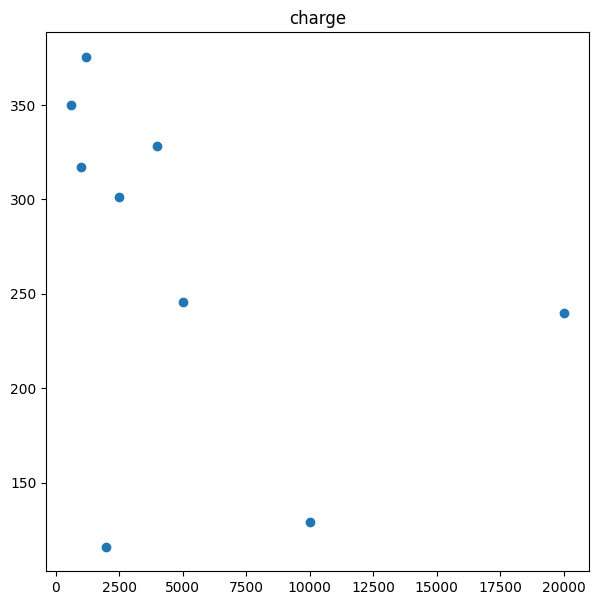

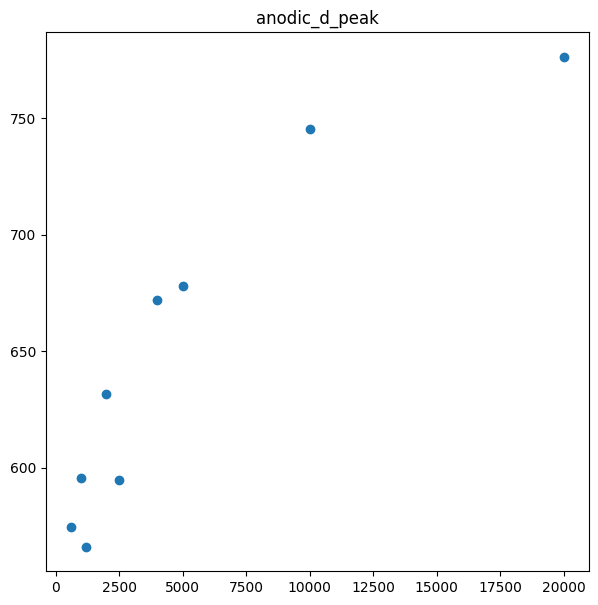

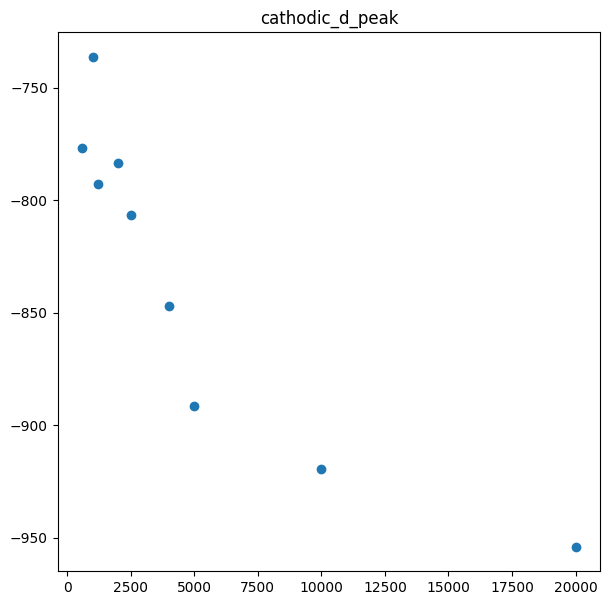

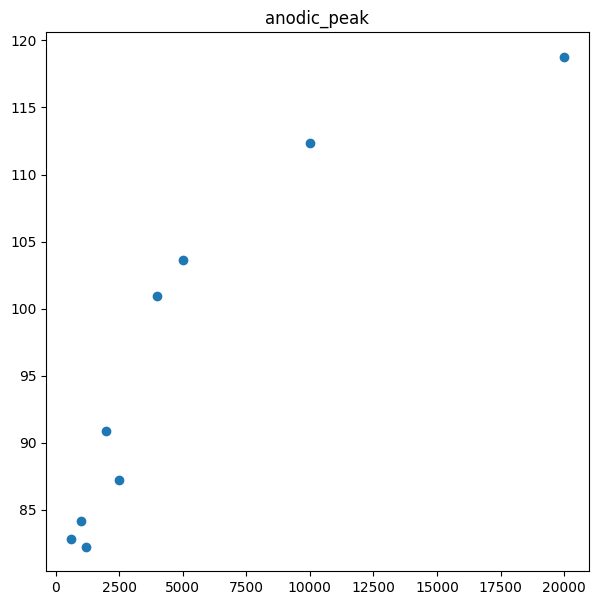

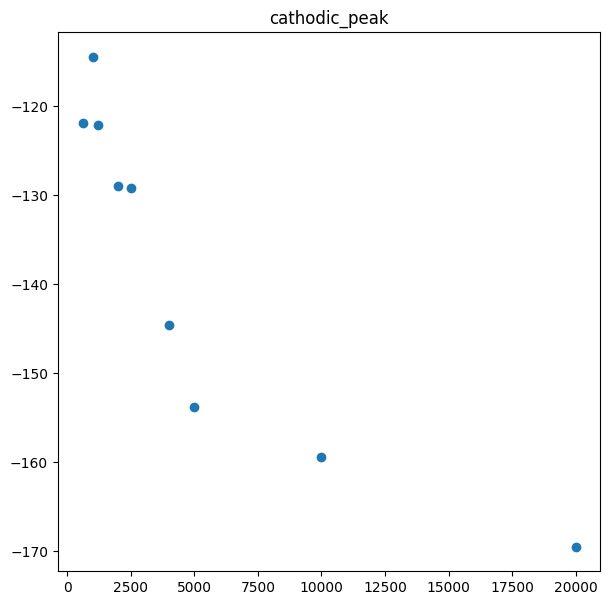

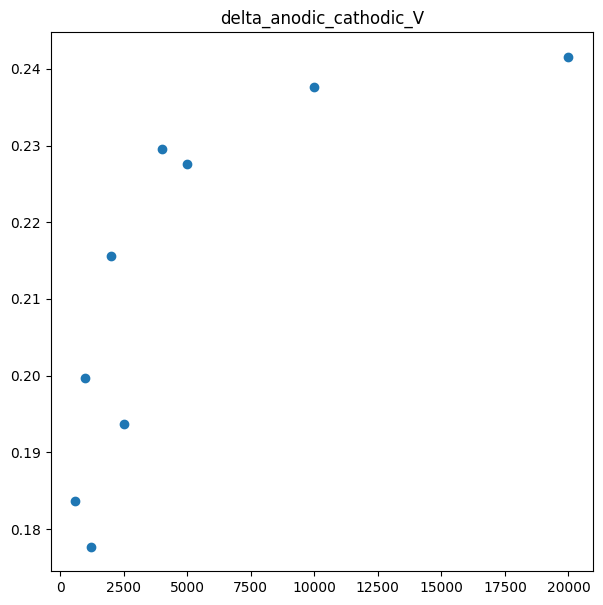

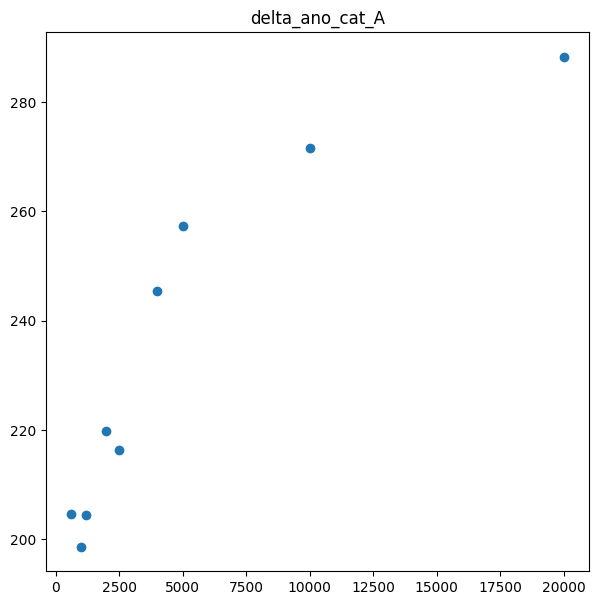

In [86]:
concentrations = dataset_troponin.iloc[:,-1]

for i in range(dataset_troponin.iloc[:,:-1].shape[1]):
    plt.figure(figsize=(7,7))
    plt.title(dataset_troponin.columns[i])
    plt.scatter(concentrations, dataset_troponin.iloc[:,i].values)
    plt.show()


<Axes: >

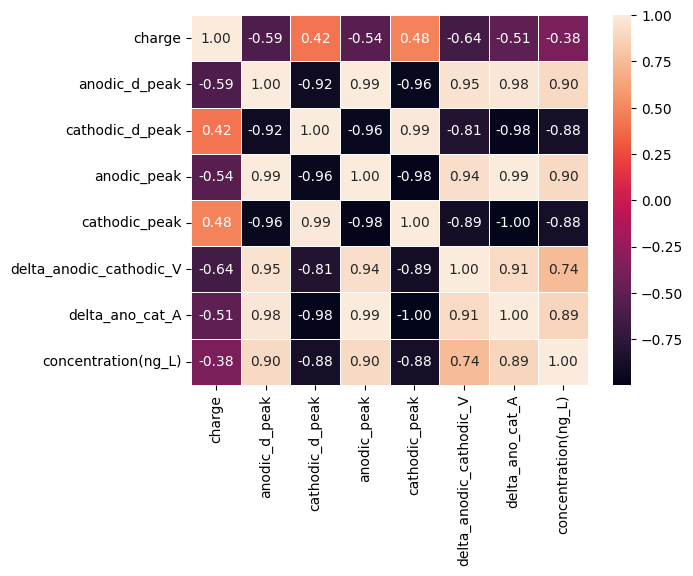

In [89]:
# Importando a Matriz de correlação
import seaborn as sn
correlations = dataset_troponin.corr()
sn.heatmap(correlations, annot=True, fmt='.2f', linewidths=.6)

In [92]:
#Salvando o dataset
dataset_troponin.to_csv('/home/pedro/Documentos/Workspace/heart_attack_analysis/data/troponin_concentration')

OSError: Cannot save file into a non-existent directory: 'data'